# Libraries

In [1]:
# Data Cleaning - EDA/
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                   #to perform visualization with many color palettes, beatifull style and many statistical plots

# A. CLEANING DATA


## A.1. Users Dataset

### Import Data

In [2]:
#define a variable name (to your liking) and assign the link with single quote.
user_url = 'https://drive.google.com/file/d/1x9uysDrHMwQ4cr87xSruHhKxG8SdqzfQ/view?usp=sharing'

#define a variable 'user'
user = 'https://drive.google.com/uc?id='+ user_url.split('/')[-2] #we use this trick to get the id of the file

df_user = pd.read_csv(user)
pd.set_option('display.max.columns',None) #to display all column, not separate)

df_user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


### Handling Missing Values

In [3]:
# Check number of NaN Value in each column
df_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [4]:
# Make a new row to indicate whether a user register with a referral codes or not
new_df_user = df_user.copy()


### New missing values handled referral_code_used row:
###     - N indicates that that particular user did register to our app without a referral code
###     - Y indicates the opposite
# Setting multiple items using a mask
n_ref = new_df_user['referral_code_used'].isna()
y_ref = new_df_user['referral_code_used'] == 'used referral'

new_df_user.loc[n_ref, 'referral_code_used'] = 0
new_df_user.loc[y_ref, 'referral_code_used'] =  1

# # Check number of NaN Value in each column
# new_df_user.isna().sum()

new_df_user.head(10)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,0,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,0,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,0,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,0,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,1,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,0,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,1,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis


No missing values. I ended up simplifying the "referral_code_used" values to make it easy to read and analyze.

### Duplicate Values

In [5]:
# check number of duplicated data
new_df_user.duplicated().sum()

0

No duplicated data detected in user table

### Convert Data Types

In [6]:
## Drop user that is registered after September
# Convert object to Datetime
new_df_user['registration_import_datetime'] = pd.to_datetime(new_df_user['registration_import_datetime'])
# Rename the column label name
new_df_user.rename(columns={'registration_import_datetime': 'registration_date'}, inplace=True)
# Drop row that has the registration month more than 9(September)
indexOctMore = new_df_user[ (new_df_user.registration_date.dt.month > 9) ].index
new_df_user.drop(indexOctMore , inplace=True)
new_df_user[new_df_user.registration_date.dt.month > 8]
# new_df_user[new_df_user.registration_date.dt.month > 9]

# Convert Integer value of 'user_id' to string
new_df_user['user_id'] = new_df_user['user_id'].astype(str)
new_df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9639 entries, 0 to 14696
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             9639 non-null   object        
 1   registration_date   9639 non-null   datetime64[ns]
 2   user_gender         9639 non-null   object        
 3   user_age            9639 non-null   int64         
 4   user_occupation     9639 non-null   object        
 5   user_income_range   9639 non-null   object        
 6   referral_code_used  9639 non-null   object        
 7   user_income_source  9639 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 677.7+ KB


### Inspect unique values and Handling Typos

In [10]:
# make list of unique value in province column to show the unique value 
# new_df_user.info()
new_df_user['user_income_range'].unique().tolist()

new_df_user['user_income_stat'] = ''
a_type = new_df_user['user_income_range'] == '< 10 Juta'
b_type = new_df_user['user_income_range'] == 'Rp 10 Juta - 50 Juta'
c_type = new_df_user['user_income_range'] == '> Rp 50 Juta - 100 Juta'
d_type = new_df_user['user_income_range'] == '> Rp 100 Juta - 500 Juta'
e_type = new_df_user['user_income_range'] == '> Rp 500 Juta - 1 Miliar'
f_type = new_df_user['user_income_range'] == '> Rp 1 Miliar'
new_df_user.loc[a_type, 'user_income_stat'] = '1'
new_df_user.loc[b_type, 'user_income_stat'] = '2'
new_df_user.loc[c_type, 'user_income_stat'] = '3'
new_df_user.loc[d_type, 'user_income_stat'] = '4'
new_df_user.loc[e_type, 'user_income_stat'] = '5'
new_df_user.loc[f_type, 'user_income_stat'] = '6'

new_df_user
# new_df_user['user_income_source'].unique().tolist()

,user_id,registration_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,user_income_stat
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,0,Gaji,5
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,0,Gaji,3
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,1,Gaji,5
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,0,Gaji,1
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4
...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,0,Lainnya,4
14693,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,1,Keuntungan Bisnis,2
14694,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,3
14695,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,0,Gaji,4


There is only one numeric column so I don't have to handle the outliers. Information for 'user_income_stat' row:
- 1: Less than 10 Juta
- 2: Rp 10 Juta - 50 Juta
- 3: more than Rp 50 Juta - 100 Juta
- 4: more than Rp 100 Juta - 500 Juta
- 5: more than Rp 500 Juta - 1 Miliar''
- 6: more than Rp 1 Miliar

### Outlier Analysis

In [11]:
new_df_user.info() #show data information
new_df_user

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9639 entries, 0 to 14696
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             9639 non-null   object        
 1   registration_date   9639 non-null   datetime64[ns]
 2   user_gender         9639 non-null   object        
 3   user_age            9639 non-null   int64         
 4   user_occupation     9639 non-null   object        
 5   user_income_range   9639 non-null   object        
 6   referral_code_used  9639 non-null   object        
 7   user_income_source  9639 non-null   object        
 8   user_income_stat    9639 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 753.0+ KB


,user_id,registration_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,user_income_stat
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,0,Gaji,5
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,0,Gaji,3
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,1,Gaji,5
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,0,Gaji,1
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4
...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,0,Lainnya,4
14693,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,1,Keuntungan Bisnis,2
14694,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,3
14695,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,0,Gaji,4


## A.2. Daily User Balance Dataset

### Import Data

In [12]:
#define a variable name (to your liking) and assign the link with single quote.
daily_user_balance_url = 'https://drive.google.com/file/d/1wpBs0l5hsgsSrm7zdLT378i-ws0_1D8J/view?usp=sharing'

#define a variable 'dub'
dub = 'https://drive.google.com/uc?id='+ daily_user_balance_url.split('/')[-2] #we use this trick to get the id of the file

df_dub = pd.read_csv(dub)
pd.set_option('display.max.columns',None) #to display all column, not separate)

df_dub

# df_dub[df_dub['user_id'] == 50701]

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


### Handling Missing Values

In [13]:
# Check number of NaN Value in each column
df_dub.isna().sum()

# Check if any column contain all null values
# df_dub.isna().all()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [14]:
# Replaced NaN data in 'transaction_amount' row in each mutual funds with 0.0 instead
new_df_dub = df_dub.copy()
# new_df_dub
# new_df_dub['user_income_stat'].loc[new_df_user['user_income_range'] == '< 10 Juta'] = 'a'

No NaN values replaced because NaN indicates empty activity so I let it as it is.

### Duplicate Values

In [15]:
# check number of duplicated data
new_df_dub.duplicated().sum()
new_df_dub[new_df_dub['user_id'].duplicated()]

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9995062.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
158734,4157054,2021-09-30,NaN,NaN,NaN,0.0,0.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN
158737,4157117,2021-09-30,NaN,NaN,NaN,0.0,0.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN
158739,4157132,2021-09-30,NaN,NaN,NaN,10002.0,10000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


No duplicate values deleted because each activity have different date and time

### Inspect unique values and Handling Typos

In [16]:
# make list of unique value in province column to show the unique value 
# new_df_user.info()
new_df_dub['date'].unique().tolist()

['2021-08-30',
 '2021-08-31',
 '2021-09-01',
 '2021-09-02',
 '2021-09-03',
 '2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-20',
 '2021-09-21',
 '2021-09-22',
 '2021-09-23',
 '2021-09-24',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-08-27',
 '2021-08-11',
 '2021-08-12',
 '2021-08-13',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-23',
 '2021-08-09',
 '2021-08-10',
 '2021-08-06',
 '2021-08-04',
 '2021-08-05']

There is no typo in the dataset

### Convert Data Types

In [17]:
# Convert Integer value to string
new_df_dub['user_id'] = new_df_dub['user_id'].astype(str)

# Convert object to Datetime
new_df_dub['date'] = pd.to_datetime(new_df_dub['date'])

new_df_dub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

### Outlier Analysis

#### Saham

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

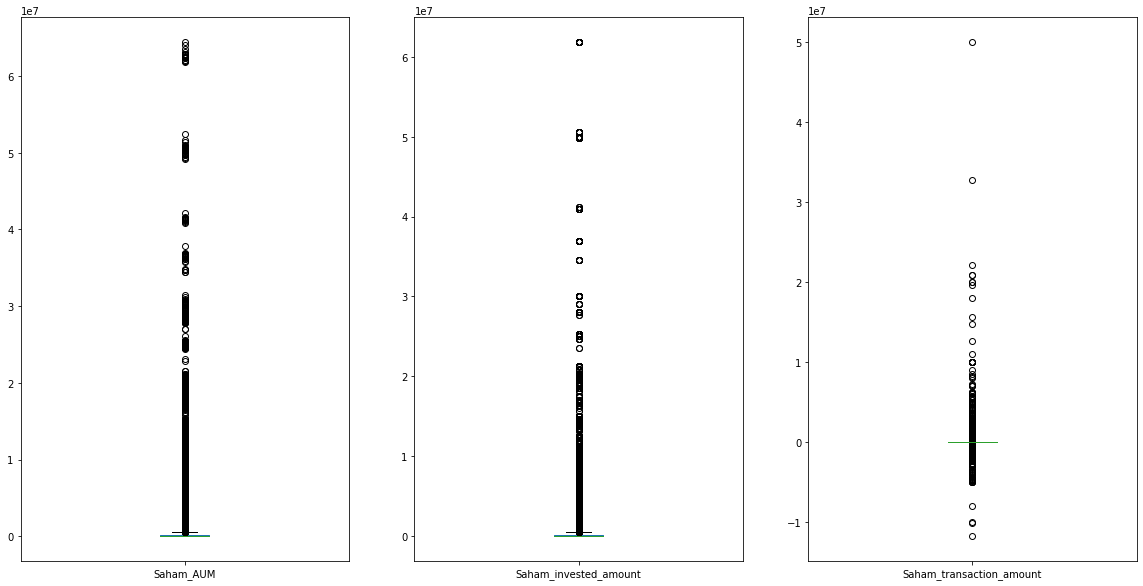

In [18]:
new_df_dub.info()

# filter numeric column
num_col_saham = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Saham (el)
for i,el in enumerate(num_col_saham):
    a = new_df_dub.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Saham_AUM'].quantile(0.25)
Q3 = new_df_dub['Saham_AUM'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_saham_aum_min = new_df_dub['Saham_AUM'] < boxplot_min
filter_saham_aum_max = new_df_dub['Saham_AUM'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_saham_aum_min | filter_saham_aum_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Saham_AUM'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Saham_AUM'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Saham_invested_amount'].quantile(0.25)
Q3 = new_df_dub['Saham_invested_amount'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_saham_invested_amount_min = new_df_dub['Saham_invested_amount'] < boxplot_min
filter_saham_invested_amount_max = new_df_dub['Saham_invested_amount'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_saham_invested_amount_min | filter_saham_invested_amount_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Saham_invested_amount'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Saham_invested_amount'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Saham_transaction_amount'].quantile(0.25)
Q3 = new_df_dub['Saham_transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_saham_transaction_amount_min = new_df_dub['Saham_transaction_amount'] < boxplot_min
filter_saham_transaction_amount_max = new_df_dub['Saham_transaction_amount'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_saham_transaction_amount_min | filter_saham_transaction_amount_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Saham_transaction_amount'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Saham_transaction_amount'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

#### Pasar Uang

In [ ]:
new_df_dub.info()

# filter numeric column
num_col_pasar_uang = ['Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Pasar Uang (el)
for i,el in enumerate(num_col_pasar_uang):
    a = new_df_dub.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Pasar_Uang_AUM'].quantile(0.25)
Q3 = new_df_dub['Pasar_Uang_AUM'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_pasar_AUM_min = new_df_dub['Pasar_Uang_AUM'] < boxplot_min
filter_pasar_AUM_max = new_df_dub['Pasar_Uang_AUM'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_pasar_AUM_min | filter_pasar_AUM_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Pasar_Uang_AUM'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Pasar_Uang_AUM'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Pasar_Uang_invested_amount'].quantile(0.25)
Q3 = new_df_dub['Pasar_Uang_invested_amount'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_pasar_uang_invested_amount_min = new_df_dub['Pasar_Uang_invested_amount'] < boxplot_min
filter_pasar_uang_invested_amount_max = new_df_dub['Pasar_Uang_invested_amount'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_pasar_uang_invested_amount_min | filter_pasar_uang_invested_amount_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Pasar_Uang_invested_amount'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Pasar_Uang_invested_amount'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

#### Pendapatan Tetap

In [ ]:
new_df_dub.info()

# filter numeric column
num_col_pendapatan_tetap = ['Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Saham (el)
for i,el in enumerate(num_col_pendapatan_tetap):
    a = new_df_dub.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Pendapatan_Tetap_AUM'].quantile(0.25)
Q3 = new_df_dub['Pendapatan_Tetap_AUM'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_pendapatan_tetap_AUM_min = new_df_dub['Pendapatan_Tetap_AUM'] < boxplot_min
filter_pendapatan_tetap_AUM_max = new_df_dub['Pendapatan_Tetap_AUM'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_pendapatan_tetap_AUM_min | filter_pendapatan_tetap_AUM_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Pendapatan_Tetap_AUM'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Pendapatan_Tetap_AUM'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Pendapatan_Tetap_invested_amount'].quantile(0.25)
Q3 = new_df_dub['Pendapatan_Tetap_invested_amount'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_pendapatan_tetap_invested_amt_min = new_df_dub['Pendapatan_Tetap_invested_amount'] < boxplot_min
filter_pendapatan_tetap_invested_amt_max = new_df_dub['Pendapatan_Tetap_invested_amount'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_pendapatan_tetap_invested_amt_min | filter_pendapatan_tetap_invested_amt_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Pendapatan_Tetap_invested_amount'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Pendapatan_Tetap_invested_amount'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

#### Campuran

In [ ]:
new_df_dub.info()

# filter numeric column
num_col_campuran = ['Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Saham (el)
for i,el in enumerate(num_col_campuran):
    a = new_df_dub.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Campuran_AUM'].quantile(0.25)
Q3 = new_df_dub['Campuran_AUM'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_campuran_AUM_min = new_df_dub['Campuran_AUM'] < boxplot_min
filter_campuran_AUM_max = new_df_dub['Campuran_AUM'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_campuran_AUM_min | filter_campuran_AUM_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Campuran_AUM'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Campuran_AUM'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

In [ ]:
# Find Q1, Q3, IQR
Q1 = new_df_dub['Campuran_invested_amount'].quantile(0.25)
Q3 = new_df_dub['Campuran_invested_amount'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# Filter value that <Bottom fence and >Upper fence
filter_campuran_invested_amount_min = new_df_dub['Campuran_invested_amount'] < boxplot_min
filter_campuran_invested_amount_max = new_df_dub['Campuran_invested_amount'] > boxplot_max

# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_non_outlier = new_df_dub.loc[~(filter_campuran_invested_amount_min | filter_campuran_invested_amount_max)]

# Check data information
df_non_outlier.info()

In [ ]:
# boxplot with outlier
new_df_dub.boxplot(column=['Campuran_invested_amount'],fontsize=10,
           rot=0,grid=False,figsize=(20,5),vert=False)

# boxplot without outlier
# df_non_outlier.boxplot(column=['Campuran_invested_amount'],fontsize=10,
#            rot=0,grid=False,figsize=(20,5),vert=False)

I choose to not deleting the outliers because of how widely varied the "outliers" in each of investment type. There is an indication that there will be some people who willing to invest highly than the others and the opposite.
Using boxplot method, there are multiple “outliers” or extreme values  that I found. My assumption is that each time, date, seasons, current market events at that time, and/or many factors are unpredictable in this kind of data, hence the multiple “outliers” or extreme values. Further analysis is required to gain more context and insight.

# B. MERGE DATA

In [44]:
# Joining data
merged = new_df_user.merge(new_df_dub, how = 'inner', on='user_id')
# merged[merged['user_id'] == '3816789']
merged

,user_id,registration_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,user_income_stat,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,N,Gaji,C,2021-08-17,189109.0,190000.0,NaN,40012.0,40000.0,NaN,270084.0,270000.0,NaN,NaN,NaN,NaN
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,N,Gaji,C,2021-08-18,188542.0,190000.0,0.0,40022.0,40000.0,0.0,270399.0,270000.0,0.0,NaN,NaN,NaN
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,N,Gaji,C,2021-08-19,185228.0,190000.0,0.0,40028.0,40000.0,0.0,270426.0,270000.0,0.0,NaN,NaN,NaN
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,N,Gaji,C,2021-08-20,184354.0,190000.0,0.0,40034.0,40000.0,0.0,270175.0,270000.0,0.0,NaN,NaN,NaN
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,N,Gaji,C,2021-08-23,186365.0,190000.0,0.0,40047.0,40000.0,0.0,270315.0,270000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,N,Keuntungan Bisnis,D,2021-09-24,9900685.0,10000000.0,0.0,10112541.0,10100000.0,0.0,40989215.0,41000000.0,0.0,NaN,NaN,NaN
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,N,Keuntungan Bisnis,D,2021-09-27,9911149.0,10000000.0,0.0,10116412.0,10100000.0,0.0,41010237.0,41000000.0,0.0,NaN,NaN,NaN
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,N,Keuntungan Bisnis,D,2021-09-28,10018447.0,10000000.0,0.0,10117871.0,10100000.0,0.0,41013869.0,41000000.0,0.0,NaN,NaN,NaN
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,N,Keuntungan Bisnis,D,2021-09-29,20161402.0,20000000.0,10000000.0,10119204.0,10100000.0,0.0,40998525.0,41000000.0,0.0,NaN,NaN,NaN


# C. DATA AGGREGATION

In [55]:
dub_df = new_df_dub.copy()
dub_df.replace(np.nan, 0.0, inplace=True) # replace every nan value with zero

### CONDITIONS for end of period august and september 
cond_aug_eop = (dub_df['date'].dt.month == 8) & (dub_df['date'].dt.day == 31)
cond_sep_eop = (dub_df['date'].dt.month == 9) & (dub_df['date'].dt.day == 30)
### CONDITIONS for ALL august and september 
cond_aug = dub_df['date'].dt.month == 8
cond_sep = dub_df['date'].dt.month == 9

### Dataframe for each eop of august and september separated 
eop_aug_df = dub_df.loc[cond_aug_eop]
eop_sep_df = dub_df.loc[cond_sep_eop]
all_aug_df = dub_df.loc[cond_aug]
all_sep_df = dub_df.loc[cond_sep]

## Total Net Transactions per user each months

In [58]:
# take total net transaction each id for total in august and september
saham_df_aug = all_aug_df.groupby(all_aug_df['user_id'])['Saham_transaction_amount'].agg('sum').reset_index()
pasaruang_df_aug = all_aug_df.groupby(all_aug_df['user_id'])['Pasar_Uang_transaction_amount'].agg('sum').reset_index()
pendapatantetap_df_aug = all_aug_df.groupby(all_aug_df['user_id'])['Pendapatan_Tetap_transaction_amount'].agg('sum').reset_index()
campuran_df_aug = all_aug_df.groupby(all_aug_df['user_id'])['Campuran_transaction_amount'].agg('sum').reset_index()
saham_df_sep = all_sep_df.groupby(all_sep_df['user_id'])['Saham_transaction_amount'].agg('sum').reset_index()
pasaruang_df_sep = all_sep_df.groupby(all_sep_df['user_id'])['Pasar_Uang_transaction_amount'].agg('sum').reset_index()
pendapatantetap_df_sep = all_sep_df.groupby(all_sep_df['user_id'])['Pendapatan_Tetap_transaction_amount'].agg('sum').reset_index()
campuran_df_sep = all_sep_df.groupby(all_sep_df['user_id'])['Campuran_transaction_amount'].agg('sum').reset_index()


a = saham_df_aug.merge(pasaruang_df_aug, how='inner', on='user_id')
b = a.merge(pendapatantetap_df_aug, how='inner', on='user_id')
aug = b.merge(campuran_df_aug, how='inner', on='user_id')
aug = aug.rename(columns={
    'Saham_transaction_amount': 'Saham_net_transactions',
    'Pasar_Uang_transaction_amount': 'Pasar_Uang_net_transactions',
    'Pendapatan_Tetap_transaction_amount': 'Pendapatan_Tetap_net_transactions', 
    'Campuran_transaction_amount': 'Campuran_net_transactions'
})
aug.insert(1, "month", "August")
aug

a = saham_df_sep.merge(pasaruang_df_sep, how='inner', on='user_id')
b = a.merge(pendapatantetap_df_sep, how='inner', on='user_id')
sep = b.merge(campuran_df_sep, how='inner', on='user_id')
sep = sep.rename(columns={
    'Saham_transaction_amount': 'Saham_net_transactions',
    'Pasar_Uang_transaction_amount': 'Pasar_Uang_net_transactions',
    'Pendapatan_Tetap_transaction_amount': 'Pendapatan_Tetap_net_transactions', 
    'Campuran_transaction_amount': 'Campuran_net_transactions'
})
sep.insert(1, "month", "September")
sep

# Join net_transactions of both month
net_trans_sep = pd.concat([aug, sep])
net_trans_sep.replace(np.nan, 0.0, inplace=True)
# net_t = pd.concat([aug, sep]).set_index(['user_id','month'])
net_trans_sep= net_trans_sep.set_index(['user_id','month'])
net_trans_sep = net_trans_sep.reset_index()
net_trans_sep = net_trans_sep[net_trans_sep['month'] == 'September']
net_trans_sep

,user_id,month,Saham_net_transactions,Pasar_Uang_net_transactions,Pendapatan_Tetap_net_transactions,Campuran_net_transactions
3075,1004326,September,0.0,0.0,0.0,0.0
3076,1005053,September,0.0,0.0,0.0,0.0
3077,1005165,September,0.0,0.0,0.0,0.0
3078,1018814,September,0.0,-1300000.0,0.0,0.0
3079,1023627,September,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11347,988940,September,0.0,0.0,0.0,0.0
11348,989618,September,480000.0,100000.0,1420000.0,0.0
11349,990466,September,770000.0,150000.0,580000.0,0.0
11350,99245,September,0.0,0.0,0.0,0.0


## End-of-Period AUMs per user each months

In [59]:
eop_aug_aum = eop_aug_df.drop(['date', 'Saham_invested_amount', 'Saham_transaction_amount',
                        'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
                        'Pendapatan_Tetap_invested_amount', 'Pendapatan_Tetap_transaction_amount', 
                        'Campuran_invested_amount', 'Campuran_transaction_amount'
                    ], axis=1)

# Extract end-of-period each AUM in September
# Take the september data, because our current data is from September
eop_sep_aum = eop_sep_df.drop(['date', 'Saham_invested_amount', 'Saham_transaction_amount',
                        'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
                        'Pendapatan_Tetap_invested_amount', 'Pendapatan_Tetap_transaction_amount', 
                        'Campuran_invested_amount', 'Campuran_transaction_amount'
                    ], axis=1)

# eop_aug_aum.insert(1, "month", "August")
# eop_sep_aum.insert(1, "month", "September")

,user_id,month,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
23,50701,September,0.0,0.0,0.0,9943587.0
46,50961,September,2063909.0,700603.0,1398998.0,0.0
74,53759,September,73179.0,10027.0,20109.0,0.0
99,54759,September,0.0,12049049.0,0.0,0.0
136,61414,September,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
158806,4165020,September,0.0,0.0,0.0,0.0
158807,4165132,September,0.0,10001.0,0.0,0.0
158808,4165630,September,41625.0,10001.0,49869.0,0.0
158809,4165704,September,0.0,0.0,9987.0,0.0


## End-of-Period Invested per user each months

In [22]:
# Extract end-of-period each invested in August and September
eop_aug_inv = eop_aug_df.drop(['date', 'Saham_AUM', 'Saham_transaction_amount',
                        'Pasar_Uang_AUM', 'Pasar_Uang_transaction_amount',
                        'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_transaction_amount', 
                        'Campuran_AUM', 'Campuran_transaction_amount'
                    ], axis=1)

eop_sep_inv = eop_sep_df.drop(['date', 'Saham_AUM', 'Saham_transaction_amount',
                        'Pasar_Uang_AUM', 'Pasar_Uang_transaction_amount',
                        'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_transaction_amount', 
                        'Campuran_AUM', 'Campuran_transaction_amount'
                    ], axis=1)
eop_aug_inv.insert(1, "month", "August")
eop_sep_inv.insert(1, "month", "September")

In [23]:
eop_aums = pd.concat([eop_aug_aum, eop_sep_aum]).set_index(['user_id', 'month'])
eop_invested = pd.concat([eop_aug_inv, eop_sep_inv]).set_index(['user_id','month'])
a_i = pd.concat([eop_aums, eop_invested], axis=1)
a_i
a_i = a_i.iloc[:,[0,4,1,5,2,6,3,7]] # move rows

a_i.replace(np.nan, 0.0, inplace=True)

##### CHECKING duplicate
# a_i = a_i.reset_index()
# a_i['Saham_AUM'].is_unique
# a_i.pivot_table(index=['user_id'], aggfunc='size')


## New Aggregated Daily User Balance data each months

In [24]:
### Join both aums and invested with total net transactions each months
a = pd.concat([a_i, net_t], axis=1).reset_index()
a.replace(np.nan, 0.0, inplace=True)
# a
data_dub_c = a.iloc[:, [0,1, 2,3,10, 4,5,11, 6,7,12, 8,9,13 ]] # move rows

## Current Total profit peruser each months

In [25]:
### Profit = total aum - total invested
data_dub_profit = data_dub_c.copy()
data_dub_profit['Saham_Profit'] = data_dub_profit['Saham_AUM']- data_dub_profit['Saham_invested_amount']
data_dub_profit['Pasar_Uang_Profit'] = data_dub_profit['Pasar_Uang_AUM']- data_dub_profit['Pasar_Uang_invested_amount']
data_dub_profit['Pendapatan_Tetap_Profit'] = data_dub_profit['Pendapatan_Tetap_AUM']- data_dub_profit['Pendapatan_Tetap_invested_amount']
data_dub_profit['Campuran_Profit'] = data_dub_profit['Campuran_AUM']- data_dub_profit['Campuran_invested_amount']

# data_dub_profit
data_dub_profit.drop([
    'Saham_AUM', 'Saham_invested_amount', 'Saham_net_transactions', 'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',	
    'Pasar_Uang_net_transactions',	'Pendapatan_Tetap_AUM',	'Pendapatan_Tetap_invested_amount',	'Pendapatan_Tetap_net_transactions', 'Campuran_AUM', 'Campuran_invested_amount', 'Campuran_net_transactions'
], axis=1, inplace=True)

data_dub_profit

,user_id,month,Saham_Profit,Pasar_Uang_Profit,Pendapatan_Tetap_Profit,Campuran_Profit
0,50701,August,0.0,0.0,0.0,206945.0
1,50961,August,16057.0,49.0,117.0,0.0
2,53759,August,839.0,6.0,66.0,0.0
3,54759,August,0.0,7875.0,0.0,0.0
4,61414,August,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11347,4165020,September,0.0,0.0,0.0,0.0
11348,4165132,September,0.0,1.0,0.0,0.0
11349,4165630,September,1625.0,1.0,-131.0,0.0
11350,4165704,September,0.0,0.0,-13.0,0.0


# D. EDA

## Preparation

In [26]:
# Define Eda_df as copy of new_df
# eda_df = new_df_user.merge(new_df_dub, how = 'inner', on='user_id')
eda_df_user = new_df_user.copy()
eda_df_dub = new_df_dub.copy()
eda_df_dub.replace(np.nan, 0.0, inplace=True) # replace every nan value with zero

eda_df_dub

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0


## Insight from data

### Descriptive Statistics

In [27]:
# How many users do we have in the data?
[eda_df_user['user_id'].nunique(),
eda_df_dub['user_id'].nunique()]

[9639, 8277]

#### Insight 1:
There are 9639 users in user table, 8277 users in daily user balance table. There are people who register through the app yet not investing in any of our mutual funds.

In [28]:
# What is the average AUM per user? What’s the AUM share of each type of mutual fund
# Hari terakhir bulan 8 = 31
# Hari terakhir bulan 9 = 30
# filter dulu baru groupby

# make a condition filter for eop aug and eop sep
cond_aug = (new_df_dub.date.dt.month == 8) & (new_df_dub.date.dt.day == 31)
cond_sep = (new_df_dub.date.dt.month == 9) & (new_df_dub.date.dt.day == 30)

# Create 4 Dataframe that represent each invested amount
is_df = new_df_dub[['user_id', 'Saham_invested_amount']].copy()
pu_df = new_df_dub[['user_id', 'Pasar_Uang_invested_amount']].copy()
pt_df = new_df_dub[['user_id', 'Pendapatan_Tetap_invested_amount']].copy()
c_df = new_df_dub[['user_id', 'Campuran_invested_amount']].copy()


In [29]:
# August eop
aug_is_df = is_df.loc[cond_aug]
aug_pu_df = pu_df.loc[cond_aug]
aug_pt_df = pt_df.loc[cond_aug]
aug_c_df = c_df.loc[cond_aug]
t = pd.merge(aug_is_df, aug_pu_df, how = 'outer', on='user_id')
t2 = t.merge(aug_pt_df, how = 'outer', on='user_id')
eop_aug = t2.merge(aug_c_df, how = 'outer', on='user_id')
eop_aug[['Saham_invested_amount', 'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_invested_amount', 'Campuran_invested_amount']].describe().apply(lambda x: round(x, 1))

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
count,2091.0,2559.0,2059.0,113.0
mean,360262.2,645078.4,1656786.0,9052178.6
std,1570291.1,5808516.1,23873438.2,26062030.8
min,0.0,0.0,0.0,0.0
25%,10000.0,10000.0,30000.0,1000000.0
50%,50000.0,20000.0,65000.0,2000000.0
75%,190000.0,110000.0,220000.0,5000000.0
max,30000000.0,240075955.0,970000000.0,250000000.0


#### Insight 2a:
- The biggest Maximum and Average of mutual funds variant being invested in August is "Pendapatan Tetap"
- The lowest Maximum and Average of mutual funds variant being invested in August is "Saham"

In [30]:
# September eop
sep_is_df = is_df.loc[cond_sep]
sep_pu_df = pu_df.loc[cond_sep]
sep_pt_df = pt_df.loc[cond_sep]
sep_c_df = c_df.loc[cond_sep]

# sep_pu_df
y = sep_is_df.merge(sep_pu_df, how = 'outer', on='user_id')
y2 = y.merge(sep_pt_df, how = 'outer', on='user_id')
eop_sep = y2.merge(sep_c_df, how = 'outer', on='user_id')
# eop_sep.info()
eop_sep[['Saham_invested_amount', 'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_invested_amount', 'Campuran_invested_amount']].describe()

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
count,5.453000e+03,6.808000e+03,5.449000e+03,2.350000e+02
mean,5.106874e+05,9.523759e+05,1.915184e+06,6.677031e+06
std,2.488666e+06,1.495981e+07,2.260974e+07,2.247071e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+04,2.000000e+05
50%,5.000000e+04,2.000000e+04,6.500000e+04,1.000000e+06
75%,2.100000e+05,1.100000e+05,2.500000e+05,5.000000e+06
max,6.184000e+07,1.012200e+09,9.700000e+08,3.000000e+08


#### Insight 2b:
- The biggest Maximum and Average of mutual funds variant being invested in September is "Pasar Uang", while "Pendapatan Tetap" is being the second in this month
- The lowest Maximum and Average of mutual funds variant being invested in August is "Saham"

## Visualize the data

### Total End-of-period Invest pertype (August and September)

<Figure size 432x288 with 0 Axes>

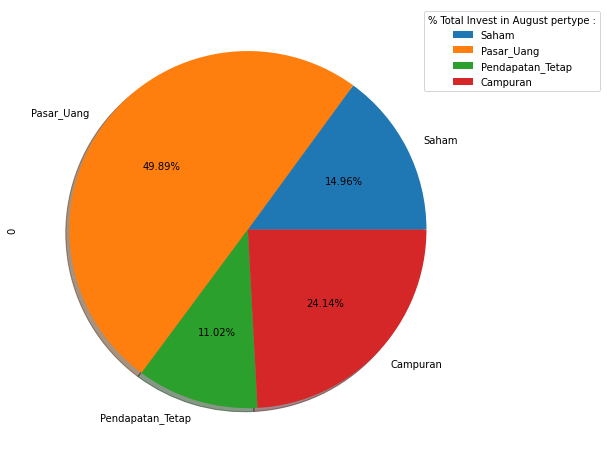

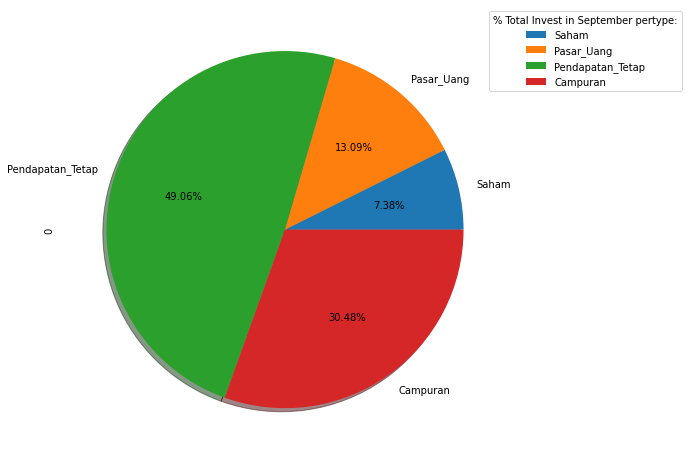

In [31]:
# MAKE PLOT FOR AUGUST
plt.figure(0)

# Use the data from previous insight
tot_aug = pd.DataFrame({
    eop_aug['Saham_invested_amount'].sum(), 
    eop_aug['Pasar_Uang_invested_amount'].sum(),
    eop_aug['Pendapatan_Tetap_invested_amount'].sum(),
    eop_aug['Campuran_invested_amount'].sum()
}, index=['Saham', 'Pasar_Uang', 'Pendapatan_Tetap', 'Campuran'])


tot_aug.plot.pie( y=0, autopct='%.2f%%', figsize=(8,16), shadow = True, rot=0)

# showing legend
plot_august = plt.legend(title = '% Total Invest in August pertype :', loc = 'upper right', bbox_to_anchor=(1.3, 1))
# plot_august


# MAKE PLOT FOR SEPTEMBER
plt.figure(1)
tot_sep = pd.DataFrame({
    eop_sep['Saham_invested_amount'].sum(), 
    eop_sep['Pasar_Uang_invested_amount'].sum(),
    eop_sep['Pendapatan_Tetap_invested_amount'].sum(),
    eop_sep['Campuran_invested_amount'].sum()
}, index=['Saham', 'Pasar_Uang', 'Pendapatan_Tetap', 'Campuran'])

# Show pie plot of Percentage orderd per payment type
# df_female.plot.pie( y='transaction_id', autopct='%.2f%%', figsize=(8,16), labels = mylabels, explode = myexplode, colors = mycolors, shadow = True, rot=0)
tot_sep.plot.pie( y=0, autopct='%.2f%%', figsize=(8,16), shadow = True, rot=0)

# showing legend
plot_september = plt.legend(title = '% Total Invest in September pertype:', loc = 'upper right', bbox_to_anchor=(1.4, 1))
# plot_september

#SHOW ALL PLOT
plt.show() 

### Daily Trend of Net Transaction

Based on the transaction total amount all time

In [32]:
# Change the date format to Month/day
monthly_df = eda_df_dub.copy()

# Number of transaction per day [group by date] for Saham, Pasar Uang, Pendapatan Tetap, and Campuran
saham_df = monthly_df.groupby(monthly_df['date'])['Saham_transaction_amount'].agg('sum').reset_index()
pasaruang_df = monthly_df.groupby(monthly_df['date'])['Pasar_Uang_transaction_amount'].agg('sum').reset_index()
pendapatantetap_df = monthly_df.groupby(monthly_df['date'])['Pendapatan_Tetap_transaction_amount'].agg('sum').reset_index()
campuran_df = monthly_df.groupby(monthly_df['date'])['Campuran_transaction_amount'].agg('sum').reset_index()

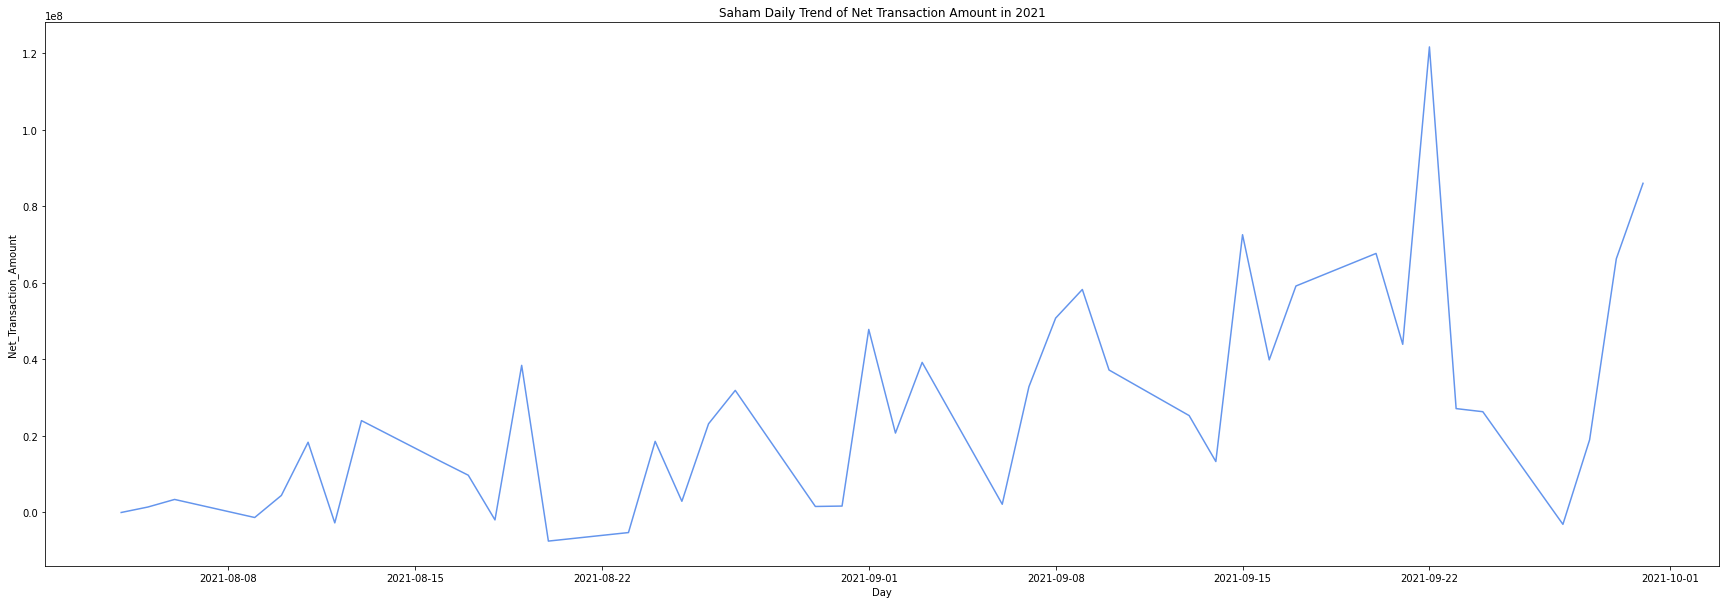

In [33]:
# Saham Bar Plot Number of Transaction per Day from August to September
fig, amount_sns= plt.subplots(figsize=(30,10))
amount_sns = sns.lineplot(data = saham_df, x='date', y='Saham_transaction_amount', color = 'cornflowerblue')

# Labelling
amount_sns.set_xlabel('Day')
amount_sns.set_ylabel('Net_Transaction_Amount')

# Title name
plt.title('Saham Daily Trend of Net Transaction Amount in 2021')
plt.show()

#### Insights 1:
1. The highest season for Saham type is in 22 September
2. The trend are steadily increased to reach its peak at 22 September, then it crashing down for three days. It rebounds back to reach its second peak at 30 September.
3. There is something happens in 23 September because it goes down after the peak season yesterday.

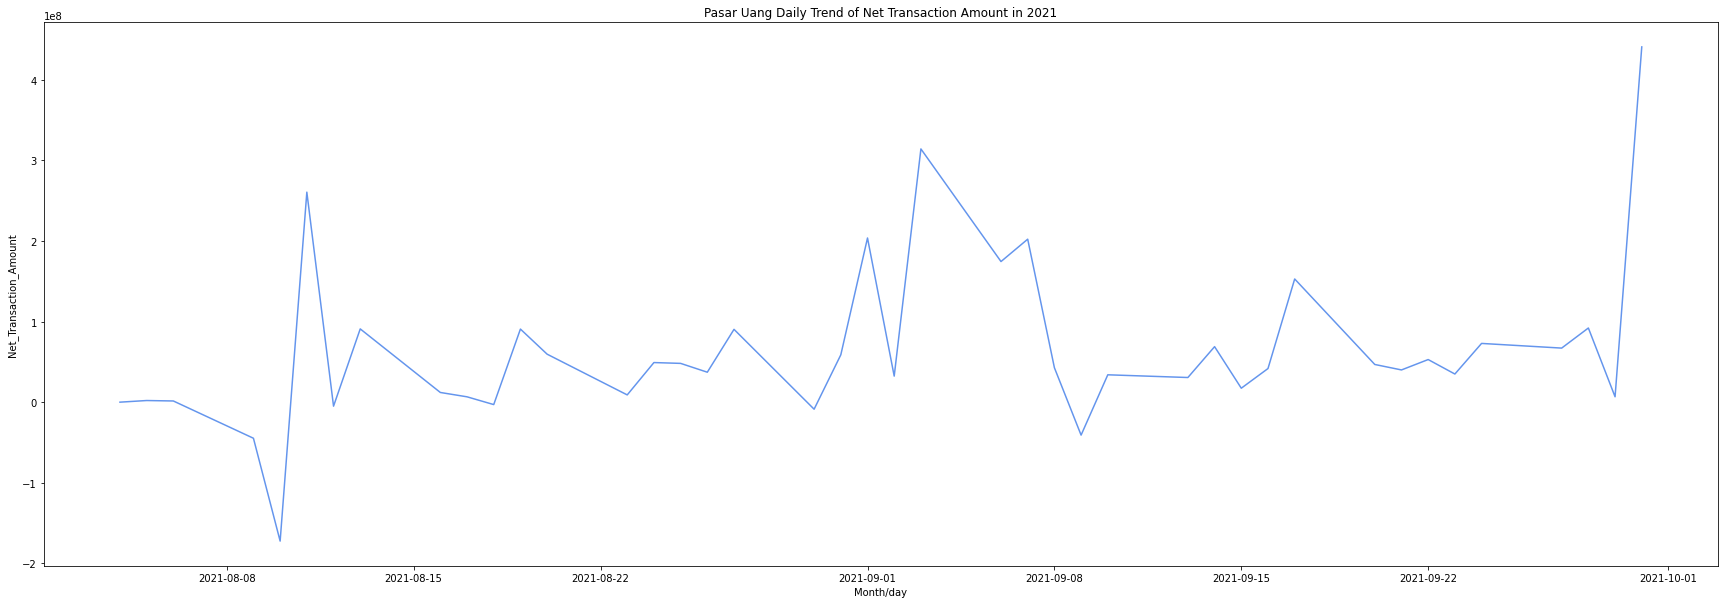

In [34]:
# Pasar Uang Bar Plot Number of Transaction per Day from August to September
fig, amount_sns= plt.subplots(figsize=(30,10))
amount_sns = sns.lineplot(data = pasaruang_df, x='date', y='Pasar_Uang_transaction_amount', color = 'cornflowerblue')

# Labelling
amount_sns.set_xlabel('Month/day')
amount_sns.set_ylabel('Net_Transaction_Amount')

# Title name
plt.title('Pasar Uang Daily Trend of Net Transaction Amount in 2021')
plt.show()

In [ ]:
# Pendapatan Tetap Bar Plot Number of Transaction per Day from August to September
fig, amount_sns= plt.subplots(figsize=(30,10))
amount_sns = sns.lineplot(data = pendapatantetap_df, x='date', y='Pendapatan_Tetap_transaction_amount', color = 'cornflowerblue')

# Labelling
amount_sns.set_xlabel('Month/day')
amount_sns.set_ylabel('Net_Transaction_Amount')

# Title name
plt.title('Pendapatan Tetap Daily Trend of Net Transaction Amount in 2021')
plt.show()

In [ ]:
# Campuran Bar Plot Number of Transaction per Day from August to September
fig, amount_sns= plt.subplots(figsize=(30,10))
amount_sns = sns.lineplot(data = campuran_df, x='date', y='Campuran_transaction_amount', color = 'cornflowerblue')

# Labelling
amount_sns.set_xlabel('Month/day')
amount_sns.set_ylabel('Net_Transaction_Amount')

# Title name
plt.title('Campuran Daily Trend of Net Transaction Amount in 2021')
plt.show()

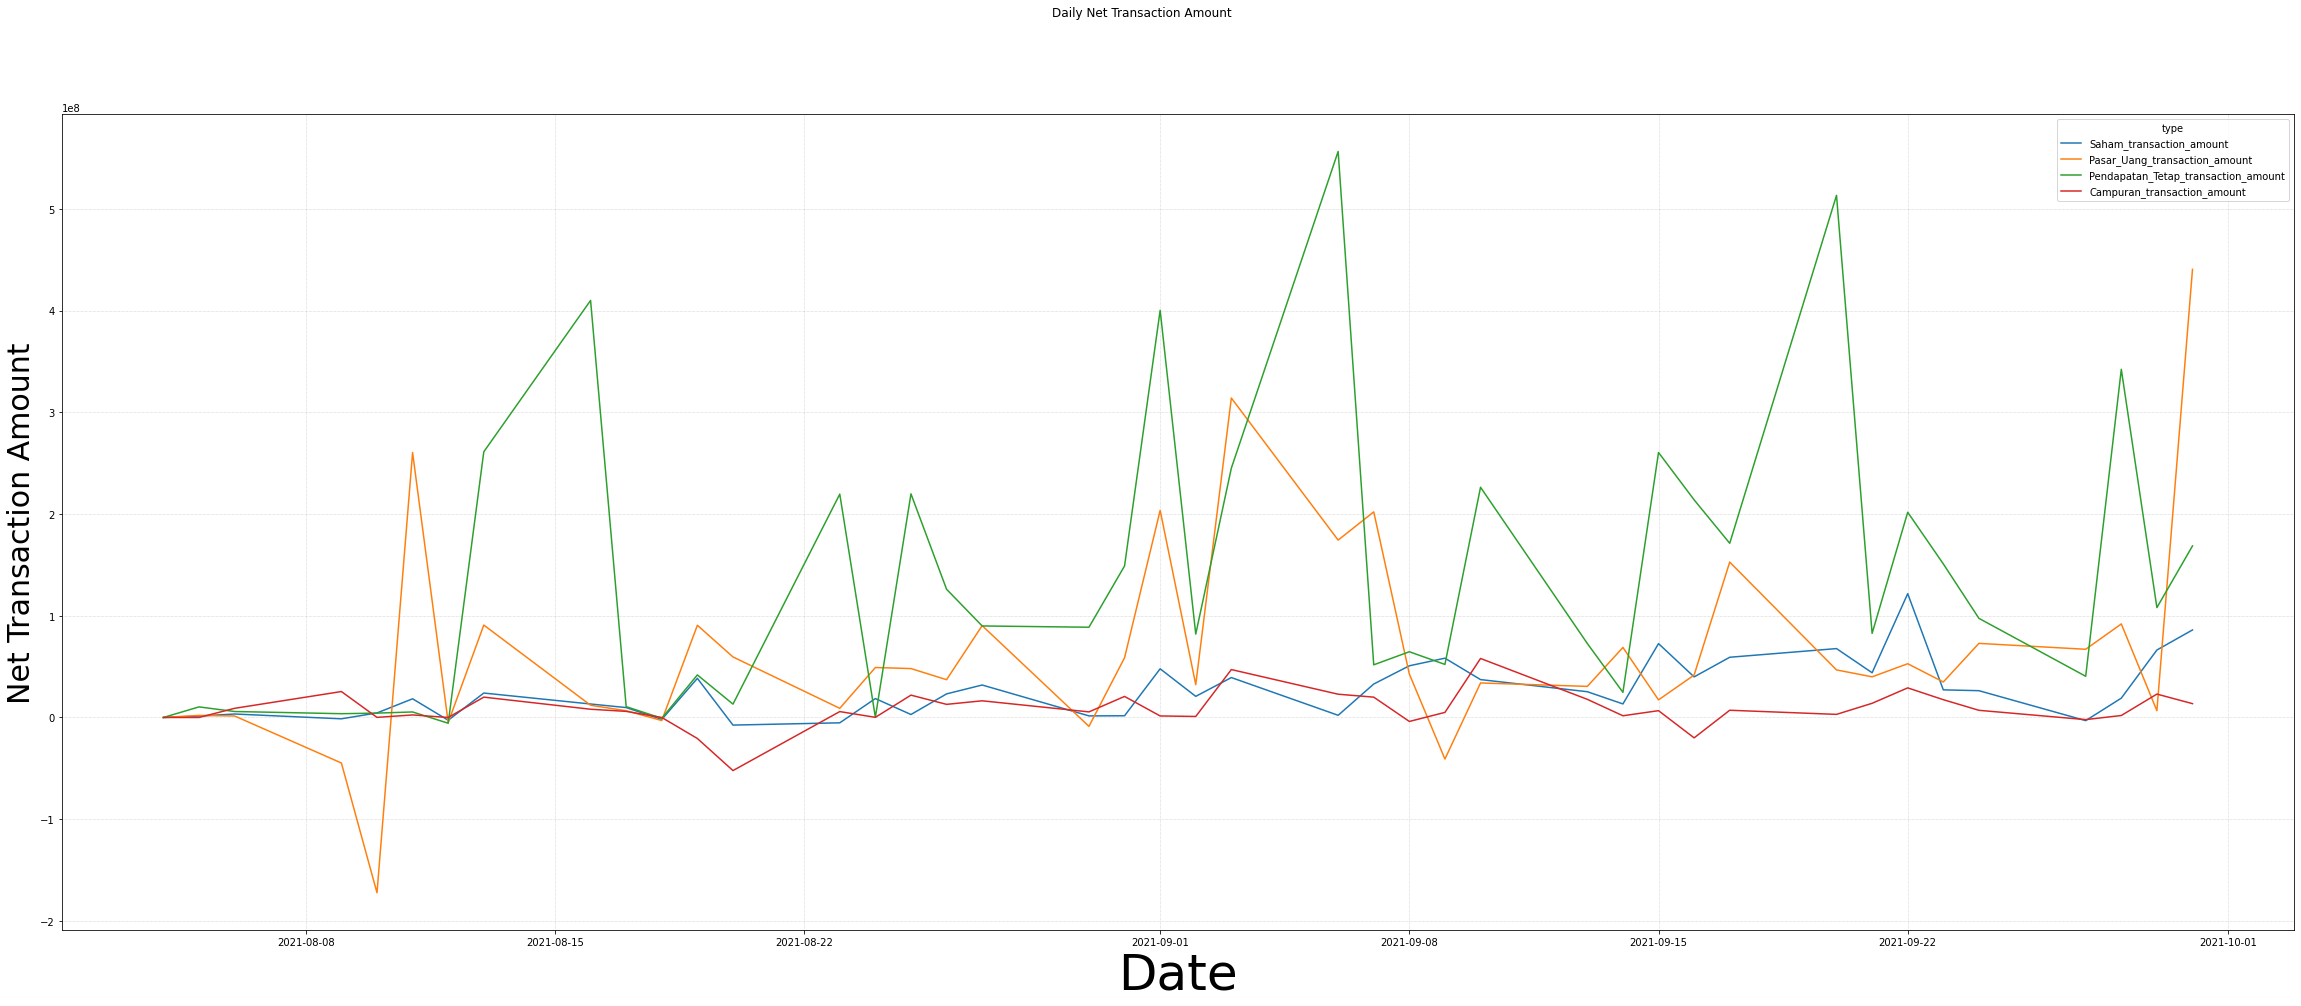

In [40]:
# Combined Type Bar Plot Number of Transaction per Day from August to September
t = saham_df.merge(pasaruang_df, how = 'inner', on='date')
t2 = t.merge(pendapatantetap_df, how = 'inner', on='date')
t3 = t2.merge(campuran_df, how = 'inner', on='date')

net_t = t3.reset_index()
net_t = net_t[['date', 'Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']]
net_t = net_t.melt('date', var_name='type', value_name='amount')
fig = plt.figure(figsize=(40, 15))

fig.suptitle('Daily Net Transaction Amount')
plt.xlabel('Date', fontsize=50)
plt.ylabel('Net Transaction Amount', fontsize=30)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)

sns.lineplot(data=net_t, x='date', y='amount', hue='type')
plt.show()

In [41]:
# Permonth Type Bar Plot Number of Transaction per Day from August to September
# Filter permonth
filter_aug = net_t.date.dt.month == 8
filter_sep = net_t.date.dt.month == 9
net_t_aug = net_t.loc[filter_aug]
net_t_sep = net_t.loc[filter_sep]

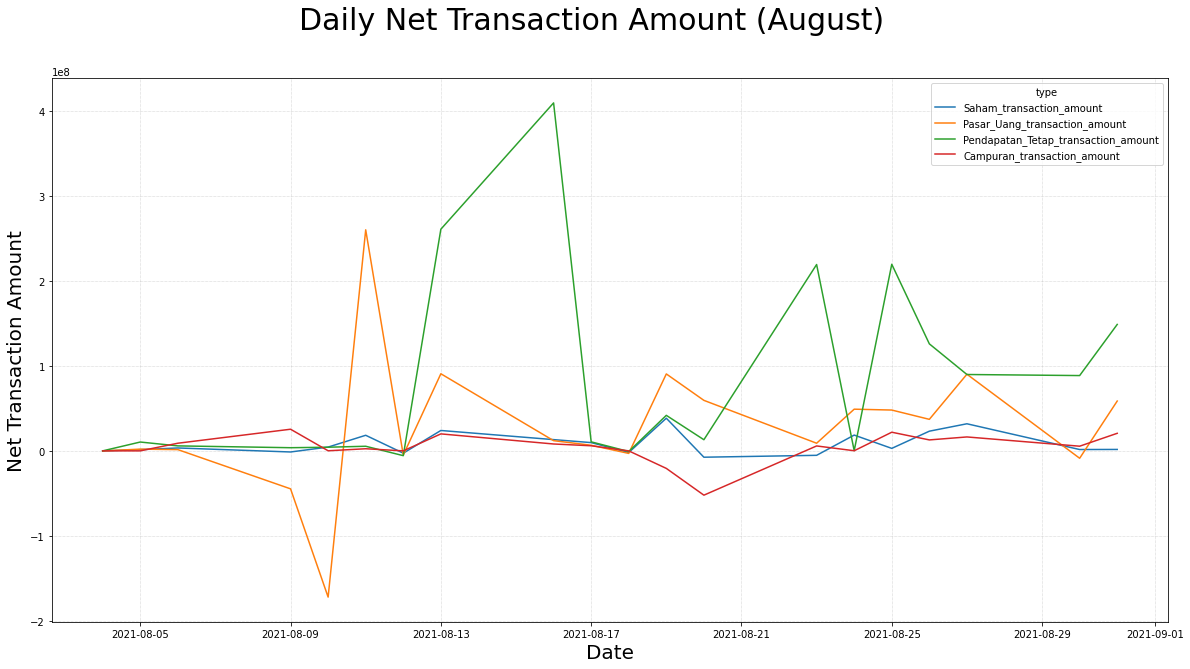

In [42]:
# Figure August
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Daily Net Transaction Amount (August)', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Net Transaction Amount', fontsize=20)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)

sns.lineplot(data=net_t_aug, x='date', y='amount', hue='type')
plt.show()

Insights 1:
- Pendapatan Tetap is the most type with biggest turn profit in Net Transaction. 
- Saham and Campuran type are consistently low
- Pasar Uang is the most volatile type, having a downright trend, reaching the lowest low around 9 August
- The overall trend are stable, even though Pendapatan Tetap, having reached the highest point at around 15 August, never reached this peak.

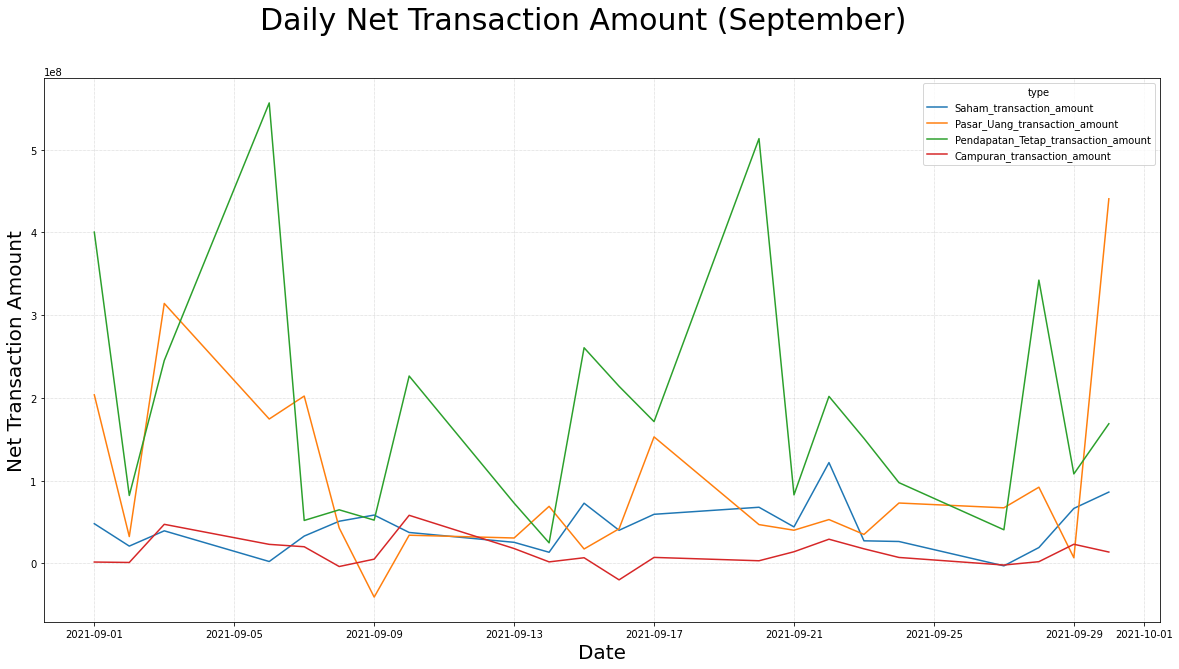

In [43]:
# Figure September
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Daily Net Transaction Amount (September)', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Net Transaction Amount', fontsize=20)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)

sns.lineplot(data=net_t_sep, x='date', y='amount', hue='type')
plt.show()

Insights 2:
- At September, Pendapatan Tetap still has the biggest profit
- Pasar Uang is still unpredictable and volatile, reaching the lowest low in 9 September and rebounded after reaching its second lowest areound 30 September
- Saham and Campuran type are still consistently low compared to August.
- The overall trend are still consistent in September.

### Active users for each mutual funds type each months
Using stacked-plot

In [44]:
# Copy the data from EDA
data_user = eda_df_user.copy()
data_dub = eda_df_dub.copy() # Daily User Balance

# The "Crazy Rich"
filter_rich = data_user['user_income_stat'] == 5
# drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
df_crazy_rich = data_user.loc[filter_rich]
df_crazy_rich

# Gen x flag, can be boolean ex: (1 or 0)
#  Active 30 days can also be boolean ex: (1 or 0)

data_user

,user_id,registration_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,user_income_stat
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,0,Gaji,5
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,0,Gaji,3
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,1,Gaji,5
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,0,Gaji,1
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4
...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,0,Lainnya,4
14693,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,1,Keuntungan Bisnis,2
14694,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,3
14695,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,0,Gaji,4


In [45]:
# Count Last active transaction past 30 days in August 

# Filter for August
cond_aug = data_dub.date.dt.month == 8
filter_saham_count_aug = (data_dub['Saham_transaction_amount'] != 0) & (cond_aug)
filter_pasaruang_count_aug = (data_dub['Pasar_Uang_transaction_amount'] != 0) & (cond_aug)
filter_pendapatan_tetap_count_aug = (data_dub['Pendapatan_Tetap_transaction_amount'] != 0) & (cond_aug)
filter_campuran_count_aug = (data_dub['Campuran_transaction_amount'] != 0) & (cond_aug)

saham_tr_s_a = data_dub.loc[filter_saham_count_aug]
saham_tr_ps_a = data_dub.loc[filter_pasaruang_count_aug]
saham_tr_pt_a = data_dub.loc[filter_pendapatan_tetap_count_aug]
saham_tr_ca_a = data_dub.loc[filter_campuran_count_aug]
cnt_s_aug = saham_tr_s_a.groupby(saham_tr_s_a['user_id'])['Saham_transaction_amount'].agg('count').reset_index()
cnt_ps_aug = saham_tr_ps_a.groupby(saham_tr_ps_a['user_id'])['Pasar_Uang_transaction_amount'].agg('count').reset_index()
cnt_pt_aug = saham_tr_pt_a.groupby(saham_tr_pt_a['user_id'])['Pendapatan_Tetap_transaction_amount'].agg('count').reset_index()
cnt_ca_aug = saham_tr_ca_a.groupby(saham_tr_ca_a['user_id'])['Campuran_transaction_amount'].agg('count').reset_index()

a = data_user.merge(cnt_s_aug, how='left', on='user_id').drop(columns = ['registration_date', 'user_gender', 'user_age', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source', 'user_income_stat'])
aa = a.merge(cnt_ps_aug, how='left', on='user_id')
aaa = aa.merge(cnt_pt_aug, how='left', on='user_id')
transactions_aug = aaa.merge(cnt_ca_aug, how='left', on='user_id')
transactions_aug.replace(np.nan, 0.0, inplace=True) # replace every nan value with zero

transactions_aug.rename(columns={
    'Saham_transaction_amount':'saham_cnt',
    'Pasar_Uang_transaction_amount': 'pasaruang_cnt',
    'Pendapatan_Tetap_transaction_amount': 'pendapatantetap_cnt',
    'Campuran_transaction_amount': 'campuran_cnt'
}, inplace=True)
# Convert float types to int
transactions_aug = transactions_aug.astype({
    'saham_cnt': int,
    'pasaruang_cnt': int,
    'pendapatantetap_cnt': int,
    'campuran_cnt': int
    })
transactions_aug.insert(1, "month", 'August' )
# transactions_aug['month'] = 'August'
transactions_aug

,user_id,month,saham_cnt,pasaruang_cnt,pendapatantetap_cnt,campuran_cnt
0,162882,August,0,0,0,0
1,3816789,August,0,0,0,0
2,3802293,August,0,0,0,0
3,3049927,August,0,0,0,0
4,1407611,August,0,0,0,0
...,...,...,...,...,...,...
9634,3773859,August,4,2,2,0
9635,3798265,August,1,1,2,0
9636,3670811,August,1,3,1,0
9637,3812221,August,2,2,2,0


In [54]:
# Count Last active transaction past 30 days in September

# Filter for September
cond_sep = data_dub.date.dt.month == 9
filter_saham_count_sep = (data_dub['Saham_transaction_amount'] != 0) & (cond_sep)
filter_pasaruang_count_sep = (data_dub['Pasar_Uang_transaction_amount'] != 0) & (cond_sep)
filter_pendapatan_tetap_count_sep = (data_dub['Pendapatan_Tetap_transaction_amount'] != 0) & (cond_sep)
filter_campuran_count_sep = (data_dub['Campuran_transaction_amount'] != 0) & (cond_sep)

saham_tr_s_s= data_dub.loc[filter_saham_count_aug]
saham_tr_ps_s = data_dub.loc[filter_pasaruang_count_sep]
saham_tr_pt_s = data_dub.loc[filter_pendapatan_tetap_count_sep]
saham_tr_ca_s = data_dub.loc[filter_campuran_count_sep]
cnt_s_sep = saham_tr_s_s.groupby(saham_tr_s_s['user_id'])['Saham_transaction_amount'].agg('count').reset_index()
cnt_ps_sep = saham_tr_ps_s.groupby(saham_tr_ps_s['user_id'])['Pasar_Uang_transaction_amount'].agg('count').reset_index()
cnt_pt_sep = saham_tr_pt_s.groupby(saham_tr_pt_s['user_id'])['Pendapatan_Tetap_transaction_amount'].agg('count').reset_index()
cnt_ca_sep = saham_tr_ca_s.groupby(saham_tr_ca_s['user_id'])['Campuran_transaction_amount'].agg('count').reset_index()

a = data_user.merge(cnt_s_sep, how='left', on='user_id').drop(columns = ['registration_date', 'user_gender', 'user_age', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source', 'user_income_stat'])
aa = a.merge(cnt_ps_sep, how='left', on='user_id')
aaa = aa.merge(cnt_pt_sep, how='left', on='user_id')
transactions_sep = aaa.merge(cnt_ca_sep, how='left', on='user_id')
transactions_sep.replace(np.nan, 0.0, inplace=True) # replace every nan value with zero

transactions_sep.rename(columns={
    'Saham_transaction_amount':'saham_cnt',
    'Pasar_Uang_transaction_amount': 'pasaruang_cnt',
    'Pendapatan_Tetap_transaction_amount': 'pendapatantetap_cnt',
    'Campuran_transaction_amount': 'campuran_cnt'
}, inplace=True)
# Convert float types to int
transactions_sep = transactions_sep.astype({
    'saham_cnt': int,
    'pasaruang_cnt': int,
    'pendapatantetap_cnt': int,
    'campuran_cnt': int
    })
transactions_sep.insert(1, "month", 'September' )
transactions_sep


,user_id,month,saham_cnt,pasaruang_cnt,pendapatantetap_cnt,campuran_cnt
0,162882,September,0,0,0,0
1,3816789,September,0,0,0,0
2,3802293,September,0,2,2,0
3,3049927,September,0,0,0,1
4,1407611,September,0,0,0,0
...,...,...,...,...,...,...
9634,3773859,September,4,1,2,0
9635,3798265,September,1,0,0,0
9636,3670811,September,1,0,0,0
9637,3812221,September,2,0,0,0


In [47]:
a = transactions_aug.groupby('month').agg(lambda x: x.ne(0).sum()).reset_index()
b = transactions_sep.groupby('month').agg(lambda x: x.ne(0).sum()).reset_index()

monthly_active_users = pd.concat([a, b]).drop(['user_id'], axis=1)
monthly_active_users

,month,saham_cnt,pasaruang_cnt,pendapatantetap_cnt,campuran_cnt
0,August,815,964,913,35
0,September,815,3034,2570,86


In [ ]:
# CREATE STACK-PLOT PLSSSSS

# E. Clustering Analysis

## BRIEF

In [48]:
import datetime as dt
from yellowbrick.cluster import SilhouetteVisualizer
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

## Data Preparation 


In [50]:
data_prep2 = data_user.copy()
# lst_unused_column = ['registration_import_datetime', 'user_occupation', 'user_income_range', 'user_income_source']
lst_unused_column = ['registration_date', 'user_occupation']
# data_prep2 = data_prep2.reset_index()

# drop unused columns
data_prep2 = data_prep2.drop(lst_unused_column,axis=1)

#check duplicated data
data_prep2.duplicated().sum()

#drop duplicated data
data_prep2.drop_duplicates(inplace=True)

# Create Gen-X(42 – 57) flag for users
gen_x_filter = (data_prep2['user_age'] >= 42) & (data_prep2['user_age'] <= 57)
data_prep2['genX_flag'] = np.where(gen_x_filter, 1, 0)
# # Create Gen-Y(millenials, 26 – 41) flag for users
gen_y_filter = (data_prep2['user_age'] >= 26) & (data_prep2['user_age'] <= 41)
data_prep2['genY_flag'] = np.where(gen_y_filter, 1, 0)
# data_prep2 = data_prep2.set_index('user_id')

### Main Data

In [53]:
# data for transactions
net_trans = net_t_sep.copy().drop(columns=['month'], axis=1).set_index('user_id')
a = pd.concat([eop_sep_aum, eop_sep_inv], axis=1)
total_trans = pd.concat([a, net_trans], axis=1).reset_index()
# # Convert Integer value of 'user_id' to string
# data_prep2['user_id'] = data_prep2['user_id'].astype(str)

# # join data preparation 2 with dataset include total number of AUMs, invested, and Net Transaction of every type
# main_data = data_prep2.merge(total_trans, how='inner', on='user_id')


,date,type,amount
20,2021-09-01,Saham_transaction_amount,47855333.0
21,2021-09-02,Saham_transaction_amount,20765206.0
22,2021-09-03,Saham_transaction_amount,39238618.0
23,2021-09-06,Saham_transaction_amount,2149362.0
24,2021-09-07,Saham_transaction_amount,32893116.0
...,...,...,...
163,2021-09-24,Campuran_transaction_amount,7050000.0
164,2021-09-27,Campuran_transaction_amount,-2100000.0
165,2021-09-28,Campuran_transaction_amount,1950000.0
166,2021-09-29,Campuran_transaction_amount,23000000.0


## Data Cleaning

### RFM Segmentation

In [64]:
# Remove every 0 transaction
data_dub2 = data_dub[data_dub['date'].dt.month > 8]
filter_s_no_transaction = (data_dub2['Saham_transaction_amount'] != 0) & (data_dub2['Saham_transaction_amount'] > 0)
filter_pu_no_transaction = data_dub2['Pasar_Uang_transaction_amount'] != 0
filter_pt_no_transaction = data_dub2['Pendapatan_Tetap_transaction_amount'] != 0
filter_c_no_transaction = data_dub2['Campuran_transaction_amount'] != 0
s_all_transaction = data_dub2.loc[filter_s_no_transaction]
pu_all_transaction = data_dub2.loc[filter_pu_no_transaction]
pt_all_transaction = data_dub2.loc[filter_pt_no_transaction]
c_all_transaction = data_dub2.loc[filter_c_no_transaction]

s_transac = s_all_transaction[s_all_transaction.columns[s_all_transaction.columns.isin(['user_id','date', 'Saham_transaction_amount'])]]
pu_transac = pu_all_transaction[pu_all_transaction.columns[pu_all_transaction.columns.isin(['user_id','date', 'Pasar_Uang_transaction_amount'])]]
pt_transac = pt_all_transaction[pt_all_transaction.columns[pt_all_transaction.columns.isin(['user_id','date', 'Pendapatan_Tetap_transaction_amount'])]]
c_transac = c_all_transaction[c_all_transaction.columns[c_all_transaction.columns.isin(['user_id','date', 'Campuran_transaction_amount'])]]
s_transac

,user_id,date,Saham_transaction_amount
25,50961,2021-09-01,1000000.0
46,50961,2021-09-30,300000.0
154,66145,2021-09-29,140000.0
166,67251,2021-09-20,530000.0
234,72676,2021-09-24,20613.0
...,...,...,...
158517,4146713,2021-09-30,50000.0
158528,4147464,2021-09-30,20000.0
158548,4148505,2021-09-30,100000.0
158555,4148714,2021-09-30,10000.0


#### Recency

In [909]:
# last 30 day transaction
# Dari hari terakhir oktober - hari terakhir user
MAX = dt.datetime(2021,10,1)

r_table_s = s_transac.groupby(['user_id']).agg({'date': lambda x: (MAX - x.max()).days}).reset_index()
r_table_s['date'] = r_table_s['date'].astype(int)
r_table_s.rename(columns={
    'date': 'r1'
}, inplace=True)
r_table_s = r_table_s.set_index("user_id")

r_table_pu = pu_transac.groupby(['user_id']).agg({'date': lambda x: (MAX - x.max()).days}).reset_index()
r_table_pu['date'] = r_table_pu['date'].astype(int)
r_table_pu.rename(columns={
    'date': 'r2'
}, inplace=True)
r_table_pu = r_table_pu.set_index("user_id")

r_table_pt = pt_transac.groupby(['user_id']).agg({'date': lambda x: (MAX - x.max()).days}).reset_index()
r_table_pt['date'] = r_table_pt['date'].astype(int)
r_table_pt.rename(columns={
    'date': 'r3'
}, inplace=True)
r_table_pt = r_table_pt.set_index("user_id")

r_table_c = c_transac.groupby(['user_id']).agg({'date': lambda x: (MAX - x.max()).days}).reset_index()
r_table_c['date'] = r_table_c['date'].astype(int)
r_table_c.rename(columns={
    'date': 'r4'
}, inplace=True)
r_table_c = r_table_c.set_index("user_id")

# Join all recency
recency_table = pd.concat([r_table_s, r_table_pu, r_table_pt, r_table_c], axis=1).reset_index()
# Fill all nan with 0 and convert it into integer
recency_table.replace(np.nan, 0.0, inplace=True)
recency_table[recency_table.columns[~recency_table.columns.isin(['user_id'])]] = recency_table[recency_table.columns[~recency_table.columns.isin(['user_id'])]].astype(int)
recency_table

,user_id,r1,r2,r3,r4
0,103108,22,0,0,0
1,1035424,9,0,0,0
2,1050345,1,1,1,0
3,1062501,28,28,28,0
4,1098153,3,3,3,0
...,...,...,...,...,...
3047,3933937,0,0,0,16
3048,3950230,0,0,0,18
3049,3965052,0,0,0,7
3050,3984286,0,0,0,9


##### Recency Total peruser
Sum all of recency for each member

In [910]:
recency_table['recency'] = recency_table['r1'] + recency_table['r2'] + recency_table['r3'] + recency_table['r4']
# Drop each type recency
rece_table = recency_table[recency_table.columns[recency_table.columns.isin(['user_id', 'recency'])]]
rece_table

,user_id,recency
0,103108,22
1,1035424,9
2,1050345,3
3,1062501,84
4,1098153,9
...,...,...
3047,3933937,16
3048,3950230,18
3049,3965052,7
3050,3984286,9


#### Frequency

In [911]:
NOW

s_t = s_transac[s_transac.columns[~s_transac.columns.isin(['date'])]]
pu_t = pu_transac[pu_transac.columns[~pu_transac.columns.isin(['date'])]]
pt_t = pt_transac[pt_transac.columns[~pt_transac.columns.isin(['date'])]]
c_t = c_transac[c_transac.columns[~c_transac.columns.isin(['date'])]]

f_table_s = s_t.groupby('user_id').agg('count').reset_index()
f_table_s.rename(columns={
    'Saham_transaction_amount': 'f1'
}, inplace=True)
f_table_s = f_table_s.set_index("user_id")

f_table_pu = pu_t.groupby('user_id').agg('count').reset_index()
f_table_pu.rename(columns={
    'Pasar_Uang_transaction_amount': 'f2'
}, inplace=True)
f_table_pu = f_table_pu.set_index("user_id")

f_table_pt = pt_t.groupby('user_id').agg('count').reset_index()
f_table_pt.rename(columns={
    'Pendapatan_Tetap_transaction_amount': 'f3'
}, inplace=True)
f_table_pt = f_table_pt.set_index("user_id")

f_table_c = c_t.groupby('user_id').agg('count').reset_index()
f_table_c.rename(columns={
    'Campuran_transaction_amount': 'f4'
}, inplace=True)
f_table_c = f_table_c.set_index("user_id")

# Join all frequcency
frequency_table = pd.concat([f_table_s, f_table_pu, f_table_pt, f_table_c], axis=1).reset_index()
# Fill all nan with 0 and convert it into integer
frequency_table.replace(np.nan, 0.0, inplace=True)
frequency_table[frequency_table.columns[~frequency_table.columns.isin(['user_id'])]] = frequency_table[frequency_table.columns[~frequency_table.columns.isin(['user_id'])]].astype(int)
frequency_table


,user_id,f1,f2,f3,f4
0,103108,2,0,0,0
1,1035424,2,0,0,0
2,1050345,2,2,2,0
3,1062501,2,2,2,0
4,1098153,1,1,1,0
...,...,...,...,...,...
3047,3933937,0,0,0,1
3048,3950230,0,0,0,2
3049,3965052,0,0,0,2
3050,3984286,0,0,0,1


##### Frequency Total peruser
Sum all of frequency for each member

In [ ]:
frequency_table['frequency'] = frequency_table['f1'] + frequency_table['f2'] + frequency_table['f3'] + frequency_table['f4']
# Drop each type frequency
freq_table = frequency_table[frequency_table.columns[frequency_table.columns.isin(['user_id', 'frequency'])]]
freq_table

### Monetary

In [931]:
# s_t
# 50961
m_table_s = s_t.groupby('user_id').agg('sum').reset_index()
m_table_s.rename(columns={
    'Saham_transaction_amount': 'm1'
}, inplace=True)
m_table_s = m_table_s.set_index("user_id")

m_table_pu = pu_t.groupby('user_id').agg('sum').reset_index()
m_table_pu.rename(columns={
    'Pasar_Uang_transaction_amount': 'm2'
}, inplace=True)
m_table_pu = m_table_pu.set_index("user_id")

m_table_pt = pt_t.groupby('user_id').agg('sum').reset_index()
m_table_pt.rename(columns={
    'Pendapatan_Tetap_transaction_amount': 'm3'
}, inplace=True)
m_table_pt = m_table_pt.set_index("user_id")

m_table_c = c_t.groupby('user_id').agg('sum').reset_index()
m_table_c.rename(columns={
    'Campuran_transaction_amount': 'm4'
}, inplace=True)
m_table_c = m_table_c.set_index("user_id")

# Join all monetary
monetary_table = pd.concat([m_table_s, m_table_pu, m_table_pt, m_table_c], axis=1).reset_index()
# Fill all nan with 0 and convert it into integer
monetary_table.replace(np.nan, 0.0, inplace=True)
monetary_table[monetary_table.columns[~monetary_table.columns.isin(['user_id'])]] = monetary_table[monetary_table.columns[~monetary_table.columns.isin(['user_id'])]].astype(int)
monetary_table

,user_id,m1,m2,m3,m4
0,103108,5000000,0,0,0
1,1035424,47000,0,0,0
2,1050345,140000,180000,680000,0
3,1062501,190000,250000,410000,0
4,1098153,70000,20000,110000,0
...,...,...,...,...,...
3047,3933937,0,0,0,2000000
3048,3950230,0,0,0,11000000
3049,3965052,0,0,0,300000
3050,3984286,0,0,0,50000


##### Monetary Total peruser
Sum all of Monetary for each member

In [ ]:
monetary_table['monetary'] = monetary_table['m1'] + monetary_table['m2'] + monetary_table['m3'] + monetary_table['m4']
# Drop each type monetary
monet_table = monetary_table[monetary_table.columns[monetary_table.columns.isin(['user_id', 'monetary'])]]
monet_table

#### RFM Table

In [1498]:
# Join all RFM table
# active transactions past 30 days
# from september to october
r_table = rece_table.set_index('user_id')
f_table = freq_table.set_index('user_id')
m_table = monet_table.set_index('user_id')

rfm_table = pd.concat([r_table, f_table, m_table], axis=1).reset_index()
# df = data_prep2.merge(rfm_table, how='inner', on='user_id')
# df

,user_id,recency,frequency,monetary
0,103108,22,2,5000000
1,1035424,9,2,47000
2,1050345,3,6,1000000
3,1062501,84,6,850000
4,1098153,9,3,200000
...,...,...,...,...
3047,3933937,16,1,2000000
3048,3950230,18,2,11000000
3049,3965052,7,2,300000
3050,3984286,9,1,50000


In [1499]:
data_users = main_data.merge(rfm_table, how='inner', on='user_id')
data_users

,user_id,user_gender,user_age,user_income_range,referral_code_used,user_income_source,user_income_stat,genX_flag,genY_flag,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,Saham_net_transactions,Pasar_Uang_net_transactions,Pendapatan_Tetap_net_transactions,Campuran_net_transactions,recency,frequency,monetary
0,3816789,Female,53,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,297141.0,40235.0,270673.0,0.0,290000.0,40000.0,270000.0,0.0,100000.0,0.0,0.0,0.0,15,1,100000
1,3802293,Female,47,> Rp 500 Juta - 1 Miliar,1,Gaji,5,1,0,9232900.0,1354013.0,3229577.0,0.0,8920000.0,1350000.0,3230000.0,0.0,5620000.0,850000.0,2030000.0,0.0,24,6,8500000
2,3049927,Male,53,< 10 Juta,0,Gaji,1,1,0,41545.0,9997.0,49925.0,910285.0,40000.0,10000.0,50000.0,899000.0,0.0,0.0,0.0,149000.0,1,1,149000
3,3783302,Male,57,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,0.0,0.0,107322.0,0.0,0.0,0.0,110431.0,0.0,-370000.0,-100000.0,-419569.0,0.0,42,3,1000000
4,3820160,Female,58,> Rp 50 Juta - 100 Juta,1,Dari Orang Tua / Anak,3,0,0,62351.0,20032.0,145083.0,0.0,60000.0,20000.0,145000.0,0.0,30000.0,0.0,50000.0,0.0,22,2,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,4074036,Male,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,2947184.0,400158.0,798798.0,24776171.0,2900000.0,400000.0,800000.0,25000000.0,2800000.0,0.0,0.0,0.0,2,1,2800000
3048,3965617,Female,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,1170156.0,200587.0,680757.0,0.0,1120000.0,200000.0,680000.0,0.0,560000.0,100000.0,340000.0,0.0,48,3,1000000
3049,3765807,Male,49,> Rp 500 Juta - 1 Miliar,0,Keuntungan Bisnis,5,1,0,21578481.0,3031615.0,6868405.0,0.0,21130000.0,3020000.0,6850000.0,0.0,10910000.0,1670000.0,3670000.0,0.0,5,25,17500000
3050,3670811,Male,49,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,208469.0,130676.0,95113.0,0.0,210000.0,130000.0,95000.0,0.0,100000.0,0.0,0.0,0.0,4,1,100000


### Scaler

<AxesSubplot:xlabel='frequency', ylabel='monetary'>

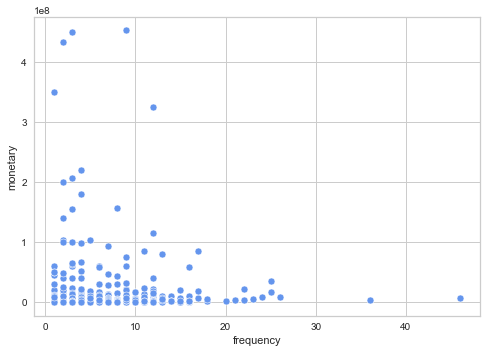

In [1473]:
# Scatter plot using Raw data before scale
sns.scatterplot (data = rfm_table, x='frequency', y='monetary', color = 'cornflowerblue')

Standard Scaler

In [1488]:
# Define Standard Scale dataset
ss_scale_df = rfm_table.copy()

# Scaling numeric value
numeric = ['frequency', 'monetary']

# using Standard Scaler
ss_scaler = StandardScaler()
ss_scale_df[numeric] = ss_scaler.fit_transform(ss_scale_df[numeric])
ss_scale_df.head()

,user_id,recency,frequency,monetary
0,103108,22,-0.361971,0.099644
1,1035424,9,-0.361971,-0.147488
2,1050345,3,0.965837,-0.099938
3,1062501,84,0.965837,-0.107422
4,1098153,9,-0.030019,-0.139854


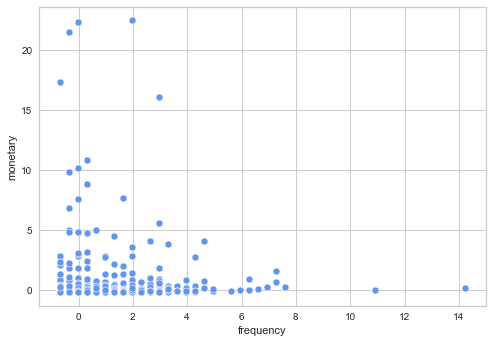

In [1475]:
# show scatter plot using standard scaler
ss_sns = sns.scatterplot (data = ss_scale_df, x='frequency', y='monetary', color = 'cornflowerblue')

based on that Standard scaler's scatter plot, we don't see a lot of different with dataset before scaling

## CLUSTER

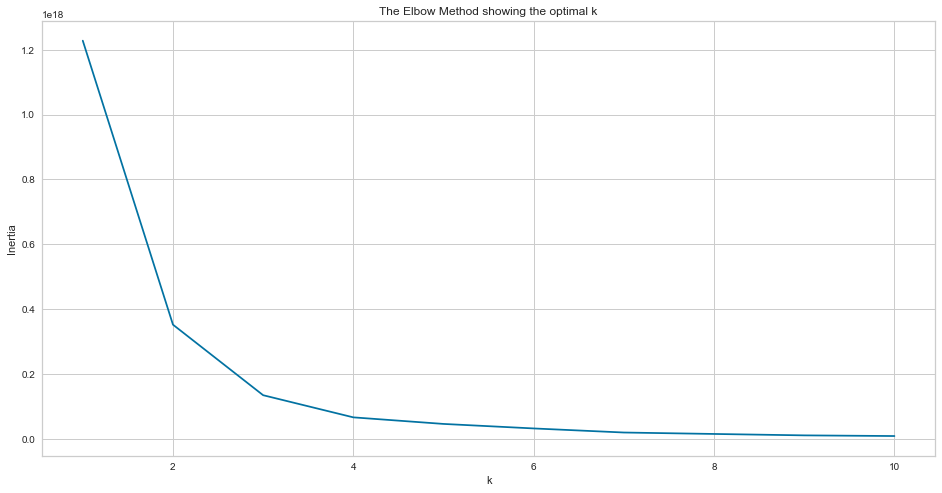

[1.227970845463016e+18, 3.52220000612823e+17, 1.3465746779546128e+17, 6.635087279955826e+16, 4.607981352450907e+16, 3.217136106835009e+16, 1.959496020957919e+16, 1.5155051414994188e+16, 1.0788742769067152e+16, 8753117959515362.0]


In [1500]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(rfm_table)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhoutte

For k=2, the average silhouette score is 0.9830224357031841
For k=3, the average silhouette score is 0.9660873758637141
For k=4, the average silhouette score is 0.9560227589022793
For k=5, the average silhouette score is 0.8725809760928944
For k=6, the average silhouette score is 0.8728697369557799
For k=7, the average silhouette score is 0.8584926013498045
For k=8, the average silhouette score is 0.7940395218549868
For k=9, the average silhouette score is 0.7944172377116523
For k=10, the average silhouette score is 0.7800700420602514


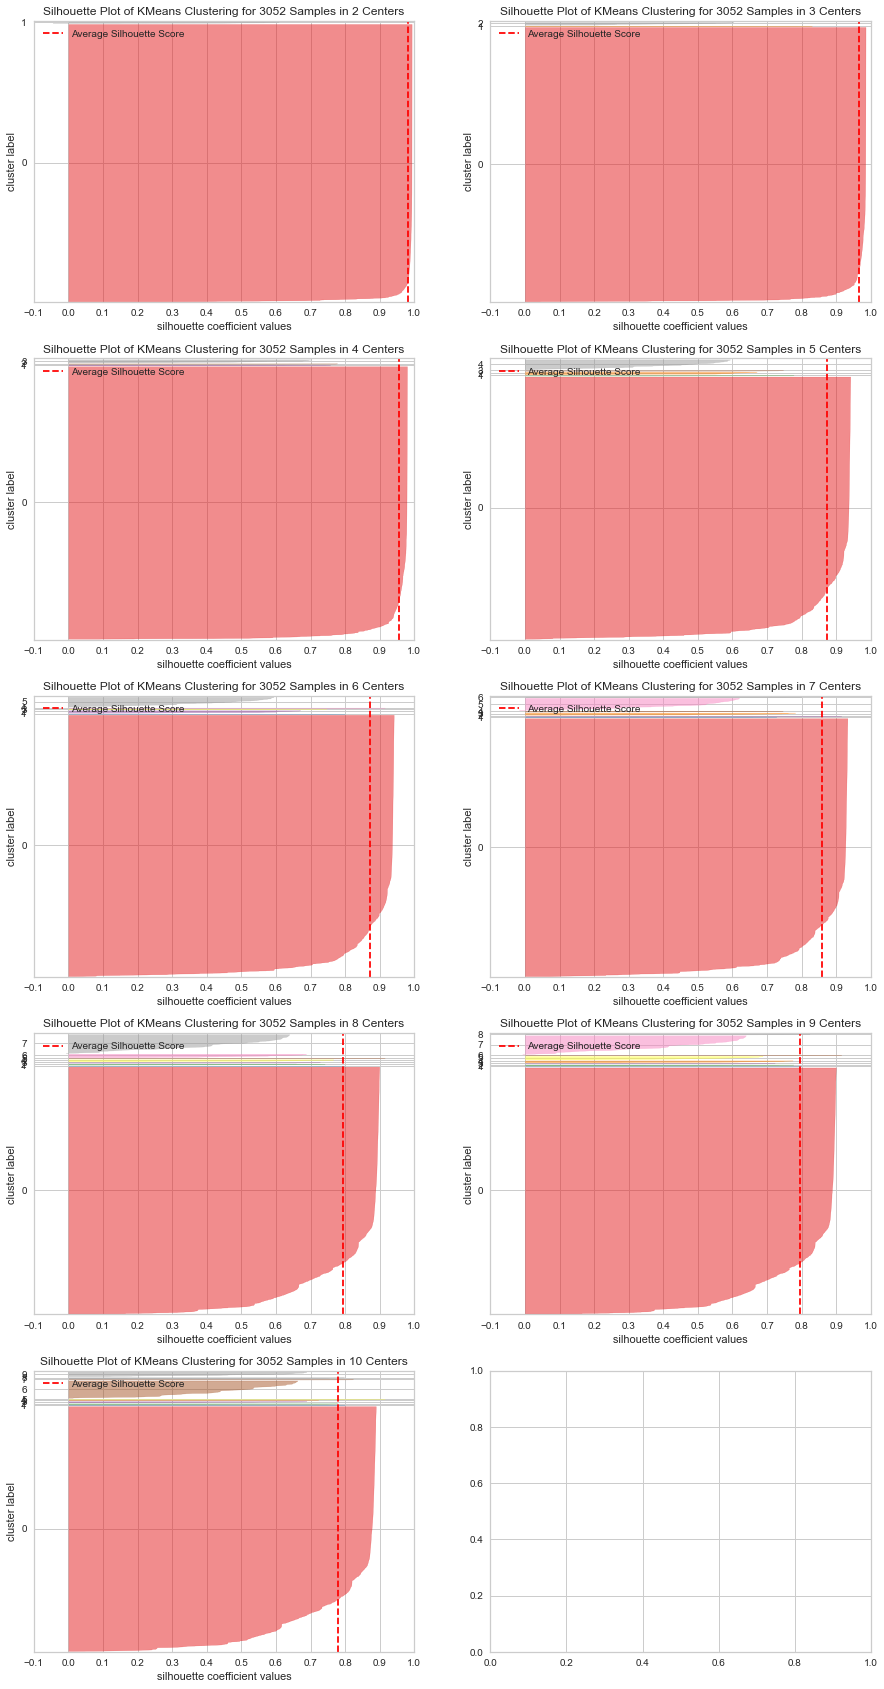

In [1477]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(rfm_table)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

### Segmentation (Fit to Model)

In [1501]:
# data_users


# Using fit_predict()
# make cluster
cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(rfm_table)
rfm_table['cluster'] = cluster_model.labels_
# rfm_table[rfm_table['cluster']==1]


#### **Check data distribution**

<AxesSubplot:xlabel='cluster', ylabel='recency'>

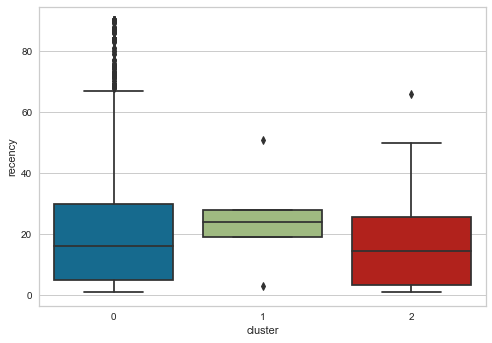

In [1502]:
# Recency of transaction
sns.boxplot (data =rfm_table , x ='cluster' , y ='recency')

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

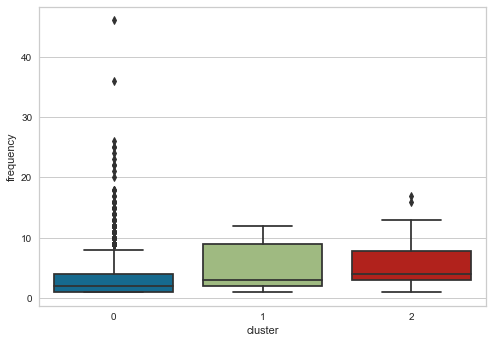

In [1480]:
# Number of transaction
sns.boxplot (data =rfm_table , x ='cluster' , y ='frequency')

<AxesSubplot:xlabel='cluster', ylabel='monetary'>

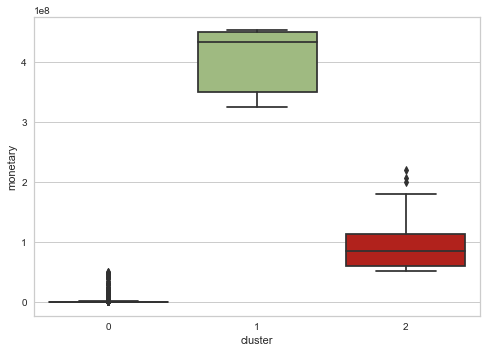

In [1481]:
# Total money spend
sns.boxplot (data =rfm_table , x ='cluster' , y ='monetary')

In [1505]:
# Merge to User main Data
Join = data_users.merge(rfm_table[['user_id','cluster']], how='inner', on='user_id')
Join

,user_id,user_gender,user_age,user_income_range,referral_code_used,user_income_source,user_income_stat,genX_flag,genY_flag,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,Saham_net_transactions,Pasar_Uang_net_transactions,Pendapatan_Tetap_net_transactions,Campuran_net_transactions,recency,frequency,monetary,cluster
0,3816789,Female,53,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,297141.0,40235.0,270673.0,0.0,290000.0,40000.0,270000.0,0.0,100000.0,0.0,0.0,0.0,15,1,100000,0
1,3802293,Female,47,> Rp 500 Juta - 1 Miliar,1,Gaji,5,1,0,9232900.0,1354013.0,3229577.0,0.0,8920000.0,1350000.0,3230000.0,0.0,5620000.0,850000.0,2030000.0,0.0,24,6,8500000,0
2,3049927,Male,53,< 10 Juta,0,Gaji,1,1,0,41545.0,9997.0,49925.0,910285.0,40000.0,10000.0,50000.0,899000.0,0.0,0.0,0.0,149000.0,1,1,149000,0
3,3783302,Male,57,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,0.0,0.0,107322.0,0.0,0.0,0.0,110431.0,0.0,-370000.0,-100000.0,-419569.0,0.0,42,3,1000000,0
4,3820160,Female,58,> Rp 50 Juta - 100 Juta,1,Dari Orang Tua / Anak,3,0,0,62351.0,20032.0,145083.0,0.0,60000.0,20000.0,145000.0,0.0,30000.0,0.0,50000.0,0.0,22,2,80000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,4074036,Male,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,2947184.0,400158.0,798798.0,24776171.0,2900000.0,400000.0,800000.0,25000000.0,2800000.0,0.0,0.0,0.0,2,1,2800000,0
3048,3965617,Female,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,1170156.0,200587.0,680757.0,0.0,1120000.0,200000.0,680000.0,0.0,560000.0,100000.0,340000.0,0.0,48,3,1000000,0
3049,3765807,Male,49,> Rp 500 Juta - 1 Miliar,0,Keuntungan Bisnis,5,1,0,21578481.0,3031615.0,6868405.0,0.0,21130000.0,3020000.0,6850000.0,0.0,10910000.0,1670000.0,3670000.0,0.0,5,25,17500000,0
3050,3670811,Male,49,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,208469.0,130676.0,95113.0,0.0,210000.0,130000.0,95000.0,0.0,100000.0,0.0,0.0,0.0,4,1,100000,0


#### Visualize Cluster

- interpret that :
1. cluster 0 = Regular Tier
2. cluster 1 = Flash Tier - not much activity anymore, but invest big. A targeted message may reactivate them.
3. cluster 2 = Spender Tier - many activities and well enough amount of money spend. can be targeted with special promotions to keep them active.

<AxesSubplot:xlabel='frequency', ylabel='monetary'>

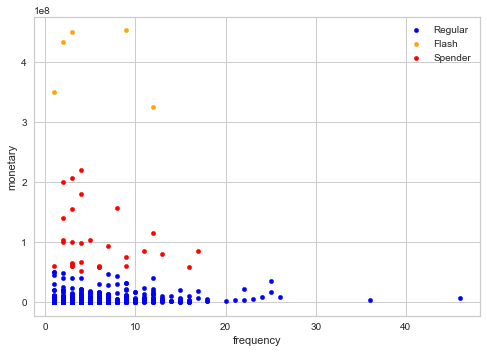

In [1511]:
# Make scatter plot based on cluster then mix it in one figure
ax = Join[Join['cluster'] == 0].plot.scatter(x='frequency', y='monetary', c='blue', label='Regular')
ax = Join[Join['cluster'] == 1].plot.scatter(x='frequency', y='monetary', c='orange', label='Flash', ax=ax)
ax = Join[Join['cluster'] == 2].plot.scatter(x='frequency', y='monetary', c='red', label='Spender', ax=ax)
ax

### DESCRIPTIVE STATISTIC

In [1512]:
Desc_Segmnt = Join.groupby('cluster')['recency', 'frequency','monetary'].agg(['count','mean','min','max','median'])
Desc_Segmnt

C:\Users\Pandu\AppData\Local\Temp\ipykernel_13628\2016999463.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Desc_Segmnt = Join.groupby('cluster')['recency', 'frequency','monetary'].agg(['count','mean','min','max','median'])


recency                           frequency                           \
          count       mean min max median     count      mean min max median   
cluster                                                                        
0          3017  22.734836   1  90   16.0      3017  3.059330   1  46    2.0   
1             5  25.000000   3  51   24.0         5  5.400000   1  12    3.0   
2            30  17.133333   1  66   14.5        30  5.833333   1  17    4.0   

        monetary                                                   
           count          mean        min        max       median  
cluster                                                            
0           3017  1.368106e+06        114   50000000     210000.0  
1              5  4.025500e+08  326000000  452950000  433800000.0  
2             30  1.008224e+08   52250000  220072498   85517750.0

### Interpreting Cluster

#### Segementation Data

In [1513]:
Join

,user_id,user_gender,user_age,user_income_range,referral_code_used,user_income_source,user_income_stat,genX_flag,genY_flag,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,Saham_net_transactions,Pasar_Uang_net_transactions,Pendapatan_Tetap_net_transactions,Campuran_net_transactions,recency,frequency,monetary,cluster
0,3816789,Female,53,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,297141.0,40235.0,270673.0,0.0,290000.0,40000.0,270000.0,0.0,100000.0,0.0,0.0,0.0,15,1,100000,0
1,3802293,Female,47,> Rp 500 Juta - 1 Miliar,1,Gaji,5,1,0,9232900.0,1354013.0,3229577.0,0.0,8920000.0,1350000.0,3230000.0,0.0,5620000.0,850000.0,2030000.0,0.0,24,6,8500000,0
2,3049927,Male,53,< 10 Juta,0,Gaji,1,1,0,41545.0,9997.0,49925.0,910285.0,40000.0,10000.0,50000.0,899000.0,0.0,0.0,0.0,149000.0,1,1,149000,0
3,3783302,Male,57,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,0.0,0.0,107322.0,0.0,0.0,0.0,110431.0,0.0,-370000.0,-100000.0,-419569.0,0.0,42,3,1000000,0
4,3820160,Female,58,> Rp 50 Juta - 100 Juta,1,Dari Orang Tua / Anak,3,0,0,62351.0,20032.0,145083.0,0.0,60000.0,20000.0,145000.0,0.0,30000.0,0.0,50000.0,0.0,22,2,80000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,4074036,Male,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,2947184.0,400158.0,798798.0,24776171.0,2900000.0,400000.0,800000.0,25000000.0,2800000.0,0.0,0.0,0.0,2,1,2800000,0
3048,3965617,Female,49,> Rp 100 Juta - 500 Juta,0,Keuntungan Bisnis,4,1,0,1170156.0,200587.0,680757.0,0.0,1120000.0,200000.0,680000.0,0.0,560000.0,100000.0,340000.0,0.0,48,3,1000000,0
3049,3765807,Male,49,> Rp 500 Juta - 1 Miliar,0,Keuntungan Bisnis,5,1,0,21578481.0,3031615.0,6868405.0,0.0,21130000.0,3020000.0,6850000.0,0.0,10910000.0,1670000.0,3670000.0,0.0,5,25,17500000,0
3050,3670811,Male,49,> Rp 50 Juta - 100 Juta,0,Gaji,3,1,0,208469.0,130676.0,95113.0,0.0,210000.0,130000.0,95000.0,0.0,100000.0,0.0,0.0,0.0,4,1,100000,0


In [1514]:
import math

#### Amount of user for each cluster

In [1550]:
Join
Join.groupby(['cluster']).count()['user_id'].apply(lambda x: math.ceil(x)).reset_index()

,cluster,user_id
0,0,3017
1,1,5
2,2,30


#### Active transaction past 30 days

In [1553]:
Join
Join.groupby(['cluster']).sum()['recency'].apply(lambda x: math.ceil(x)).reset_index()

,cluster,recency
0,0,68591
1,1,125
2,2,514


#### The max Transaction/Spending in all types

In [1518]:

Join
Join.groupby(['cluster']).max()['monetary'].apply(lambda x: math.ceil(x)).reset_index()

,cluster,monetary
0,0,50000000
1,1,452950000
2,2,220072498



- Cluster 0 =  48.003.480   |   48 JT
- Cluster 1 = 452.950.000   |  452 JT
- Cluster 2 = 220.072.498   |  220 JT 

#### Number of Transaction

In [1549]:
Join.groupby(['cluster']).sum()['frequency'].reset_index()

,cluster,frequency
0,0,9230.0
1,1,27.0
2,2,175.0


#### Number of Transaction based on gender

In [1520]:
Join
Join.groupby(['cluster','user_gender']).nunique()['user_id'].reset_index()

,cluster,user_gender,user_id
0,0,Female,1301
1,0,Male,1716
2,1,Female,1
3,1,Male,4
4,2,Female,18
5,2,Male,12


INSIGHT:
- Cluster 1: 60% are Male
- Cluster 2: 4 out of 5 are Male
- Cluster 3: 60% are Female

- Cluster 1 has the most active user in the last 30 days and frequently use the app to invest
- Cluster 2 are only five people and not engage and/or investing with the app that much anymore
- Cluster 3 are in the middle of cluster 1 and 2 for spending power and frequent transaction.

#### Affinity for funds

In [1521]:
Join.groupby(['cluster'])['Saham_net_transactions', 'Pasar_Uang_net_transactions', 'Pendapatan_Tetap_net_transactions', 'Campuran_net_transactions'].agg('mean')

C:\Users\Pandu\AppData\Local\Temp\ipykernel_13628\822265149.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Join.groupby(['cluster'])['Saham_net_transactions', 'Pasar_Uang_net_transactions', 'Pendapatan_Tetap_net_transactions', 'Campuran_net_transactions'].agg('mean')


,Saham_net_transactions,Pasar_Uang_net_transactions,Pendapatan_Tetap_net_transactions,Campuran_net_transactions
cluster,,,,
0,2.579911e+05,2.978144e+05,4.325636e+05,8.415550e+04
1,3.500000e+06,9.476000e+07,3.012700e+08,2.600000e+06
2,8.368844e+06,2.934075e+07,5.274018e+07,6.000000e+05


#### Income levels

In [1526]:
Join
Join.groupby(['cluster', 'user_income_range'])['user_income_range'].agg('count')

cluster  user_income_range       
0        < 10 Juta                   1140
         > Rp 1 Miliar                  6
         > Rp 100 Juta - 500 Juta     311
         > Rp 50 Juta - 100 Juta      574
         > Rp 500 Juta - 1 Miliar      33
         Rp 10 Juta - 50 Juta         953
1        < 10 Juta                      1
         > Rp 100 Juta - 500 Juta       2
         > Rp 50 Juta - 100 Juta        1
         > Rp 500 Juta - 1 Miliar       1
2        < 10 Juta                      1
         > Rp 100 Juta - 500 Juta      15
         > Rp 50 Juta - 100 Juta        7
         > Rp 500 Juta - 1 Miliar       2
         Rp 10 Juta - 50 Juta           5
Name: user_income_range, dtype: int64

- Cluster 1: has affinity for Campuran and Pendapatan Tetap type, income range concentrated from less than 10 juta to 50 Juta, and has the highest transaction frequency

- Cluster 2: has affinity for Pasar Uang and Saham type, income range are varied from all income range available(one of them are spending around 500 juta to 1 miliar), and has the lowest transaction frequency

- Cluster 3: has affinity for Saham and Pendapatan Tetap type, income range concentrated in 100 juta, and has the second lowest transaction frequency

In [1545]:
Join
Join.groupby(['cluster','genX_flag']).nunique()['user_id'].reset_index()

,cluster,genX_flag,user_id
0,0,0,2763
1,0,1,254
2,1,0,4
3,1,1,1
4,2,0,20
5,2,1,10


In [1546]:
Join
Join.groupby(['cluster','genY_flag']).nunique()['user_id'].reset_index()

,cluster,genY_flag,user_id
0,0,0,1748
1,0,1,1269
2,1,0,2
3,1,1,3
4,2,0,13
5,2,1,17
